## Amazon E-Commerce Market Sales

## Task 1

In [36]:
import pandas as pd
df = pd.read_csv("amazon.csv",low_memory=False)
df.head()

,Unnamed: 0,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,...,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,...,B09KXVBD7Z,Unknown,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,...,B09K3WFS32,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,False
2,2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,...,B07WV4JV4D,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,...,B099NRCT7B,Unknown,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,...,B098714BZP,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,False


In [6]:
df.shape #Rows,coloumns

(128975, 22)

In [7]:
df.dtypes #datatypes

Unnamed: 0             int64
index                  int64
Order ID              object
Date                  object
Status                object
Fulfilment            object
Sales Channel         object
ship-service-level    object
Style                 object
SKU                   object
Category              object
Size                  object
ASIN                  object
Courier Status        object
Qty                    int64
currency              object
Amount                object
ship-city             object
ship-state            object
ship-postal-code      object
ship-country          object
B2B                     bool
dtype: object

In [8]:
'Date' in df.columns

True

In [9]:
'Revenue' in df.columns

False

In [10]:
'Order ID' in df.columns

True

In [11]:
missing_values=df.isnull().sum()
missing_values

Unnamed: 0            0
index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64

In [12]:
duplicates=df.duplicated()
duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
128970    False
128971    False
128972    False
128973    False
128974    False
Length: 128975, dtype: bool

In [13]:
pd.to_datetime(df['Date'])

0        2022-04-30
1        2022-04-30
2        2022-04-30
3        2022-04-30
4        2022-04-30
            ...    
128970   2022-05-31
128971   2022-05-31
128972   2022-05-31
128973   2022-05-31
128974   2022-05-31
Name: Date, Length: 128975, dtype: datetime64[ns]

In [14]:
key_columns= ['Order ID', 'Date', 'Qty', 'Amount', 'Category', 
               'ship-city', 'ship-state', 'ship-country']
key_columns

['Order ID',
 'Date',
 'Qty',
 'Amount',
 'Category',
 'ship-city',
 'ship-state',
 'ship-country']

In [15]:
cols_to_drop = ['promotion-ids', 'fulfilled-by', 'Unnamed: 22']
for col in cols_to_drop:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

In [17]:
if 'Qty' in df.columns:
    df['Qty'] = df['Qty'].fillna(0)

In [18]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.dropna(subset=['Date']) 

In [19]:
for col in ['ship-city','ship-state','ship-country']:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

In [20]:
if 'Order ID' in df.columns and 'SKU' in df.columns:
    df = df.drop_duplicates(subset=['Order ID','SKU'])

In [21]:
print(df.isnull().sum())

Unnamed: 0            0
index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64


In [23]:
df = df.dropna(axis=1, how="all")

In [24]:
df = df.dropna(subset=["Order ID", "Date", "Qty", "Amount"])

In [25]:
df["Qty"] = df["Qty"].fillna(df["Qty"].median())

In [26]:
for col in ["Category", "ship-city", "ship-state"]:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

In [27]:
df = df.drop_duplicates(subset=["Order ID", "SKU"], keep="first")

In [28]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

In [29]:
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")

In [30]:
df["Qty"] = df["Qty"].astype(int)

In [31]:
df["Category"] = df["Category"].str.strip().str.title()
df["ship-state"] = df["ship-state"].str.strip().str.title()
df["ship-city"] = df["ship-city"].str.strip().str.title()

In [32]:
df = df[(df["Qty"] >= 0) & (df["Amount"] >= 0)]

In [33]:
q1, q3 = df["Amount"].quantile([0.25, 0.75])
iqr = q3 - q1
lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr

In [42]:
import numpy as np
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")
df["Amount"] = np.where(df["Amount"] > upper, upper, df["Amount"])
df = df.dropna(subset=["Amount"])

In [43]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Now you can safely extract features
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.day_name()

In [47]:
output_path = "cleaned_amazon_processed.csv"

df.to_csv(output_path, index=False, encoding="utf-8-sig")

print("✅ Cleaning completed. File saved at:", output_path)

✅ Cleaning completed. File saved at: cleaned_amazon_processed.csv


## Task 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")
sns.set_palette("muted")

In [3]:
df = pd.read_csv("cleaned_amazon_processed.csv")

In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [5]:
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')

In [6]:
df_sales = df[df['Status'].str.contains("Shipped", case=False, na=False)].copy()

In [7]:
monthly_sales = (
    df_sales.groupby(df_sales['Date'].dt.to_period("M"))['Total Revenue']
    .sum()
    .reset_index()
)
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()
best_month = monthly_sales.loc[monthly_sales['Total Revenue'].idxmax()]
worst_month = monthly_sales.loc[monthly_sales['Total Revenue'].idxmin()]

print("✅ Best Month:", best_month['Date'].strftime("%B %Y"), "→", best_month['Total Revenue'])
print("❌ Worst Month:", worst_month['Date'].strftime("%B %Y"), "→", worst_month['Total Revenue'])

✅ Best Month: April 2022 → 26066811.0
❌ Worst Month: March 2022 → 94810.0


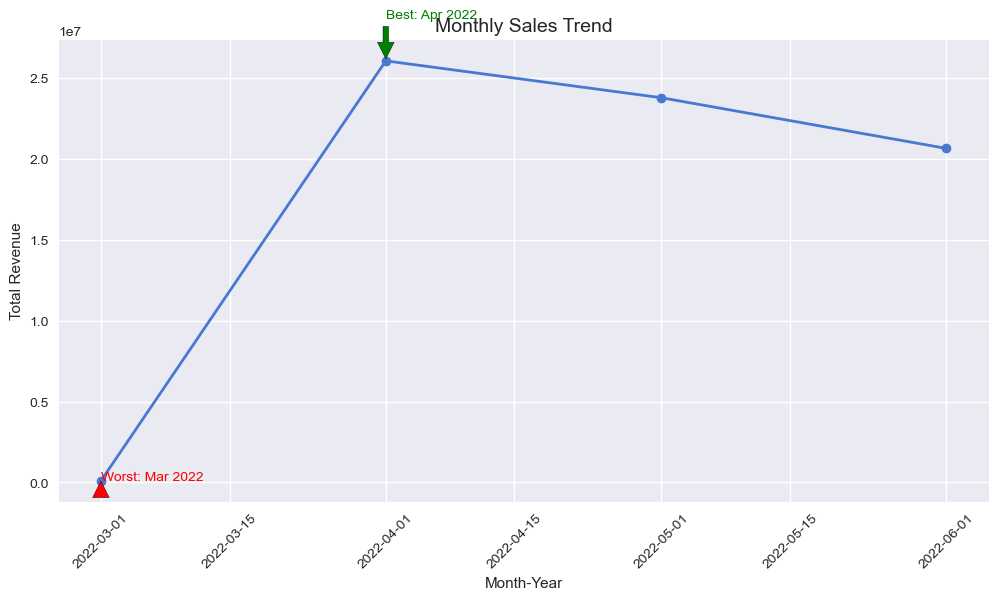

In [8]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Date'], monthly_sales['Total Revenue'], marker='o', linewidth=2)
plt.annotate(f"Best: {best_month['Date'].strftime('%b %Y')}",
             xy=(best_month['Date'], best_month['Total Revenue']),
             xytext=(best_month['Date'], best_month['Total Revenue']*1.1),
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=10, color='green')

plt.annotate(f"Worst: {worst_month['Date'].strftime('%b %Y')}",
             xy=(worst_month['Date'], worst_month['Total Revenue']),
             xytext=(worst_month['Date'], worst_month['Total Revenue']*1.5),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10, color='red')

plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


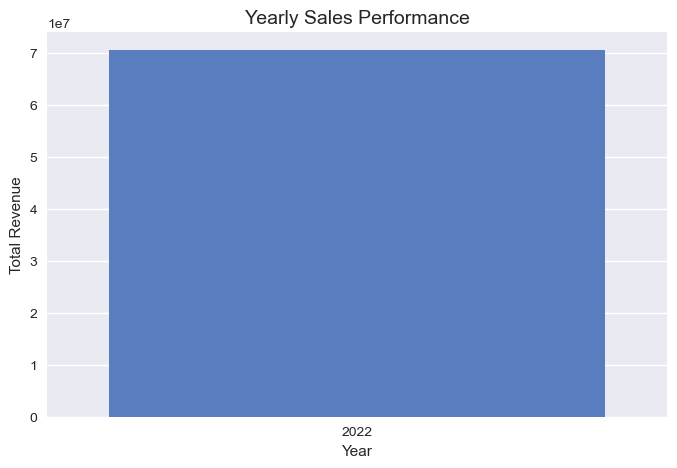


📈 Yearly Sales Performance:
   Year  Total Revenue
0  2022     70598700.0


In [13]:
yearly_sales = (
    df_sales.groupby(df_sales['Date'].dt.year)['Total Revenue']
    .sum()
    .reset_index()
    .rename(columns={'Date':'Year'})
)

plt.figure(figsize=(8,5))
sns.barplot(data=yearly_sales, x='Year', y='Total Revenue')  
plt.title("Yearly Sales Performance", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.show()

print("\n📈 Yearly Sales Performance:")
print(yearly_sales)

In [14]:
top_months = monthly_sales.sort_values(by="Total Revenue", ascending=False).head(5)
low_months = monthly_sales.sort_values(by="Total Revenue", ascending=True).head(5)

print("\n🏆 Top 5 Performing Months:\n", top_months)
print("\n📉 Lowest 5 Performing Months:\n", low_months)


🏆 Top 5 Performing Months:
         Date  Total Revenue
1 2022-04-01     26066811.0
2 2022-05-01     23785331.0
3 2022-06-01     20651748.0
0 2022-03-01        94810.0

📉 Lowest 5 Performing Months:
         Date  Total Revenue
0 2022-03-01        94810.0
3 2022-06-01     20651748.0
2 2022-05-01     23785331.0
1 2022-04-01     26066811.0


In [26]:
growth_rate = (
    (yearly_sales['Total Revenue'].iloc[-1] - yearly_sales['Total Revenue'].iloc[0])
    / yearly_sales['Total Revenue'].iloc[0]
) * 100 if len(yearly_sales) > 1 else 0

print("\nKEY FINDINGS:")
print(f"- Best Performing Month: {best_month['Date'].strftime('%B %Y')} with Revenue {best_month['Total Revenue']}")
print(f"- Worst Performing Month: {worst_month['Date'].strftime('%B %Y')} with Revenue {worst_month['Total Revenue']}")
print(f"- Overall Growth Rate: {growth_rate:.2f}% from {yearly_sales['Year'].iloc[0]} to {yearly_sales['Year'].iloc[-1]}")
print("- Seasonal spikes may indicate festive periods (Diwali, Christmas, New Year).")
print("- Low months could benefit from targeted discounts or promotions.")


KEY FINDINGS:
- Best Performing Month: April 2022 with Revenue 26066811.0
- Worst Performing Month: March 2022 with Revenue 94810.0
- Overall Growth Rate: 0.00% from 2022 to 2022
- Seasonal spikes may indicate festive periods (Diwali, Christmas, New Year).
- Low months could benefit from targeted discounts or promotions.


In [17]:
product_sales = (
    df_sales.groupby(['SKU', 'Category'])
    .agg({'Qty':'sum', 'Total Revenue':'sum'})
    .reset_index()
    .rename(columns={'Qty':'Total Quantity', 'Total Revenue':'Total Revenue'})
)

product_sales['Rank by Revenue'] = product_sales['Total Revenue'].rank(ascending=False)
product_sales['Rank by Quantity'] = product_sales['Total Quantity'].rank(ascending=False)

In [18]:
top_products = product_sales.sort_values(by="Total Revenue", ascending=False).head(10)
print("🏆 Top 10 Products by Revenue:")
print(top_products[['SKU','Category','Total Quantity','Total Revenue']])

🏆 Top 10 Products by Revenue:
                  SKU       Category  Total Quantity  Total Revenue
1316      J0230-SKD-M            Set             435       481387.0
4479     JNE3797-KR-L  Western Dress             629       455990.0
1317      J0230-SKD-S            Set             394       438460.0
4480     JNE3797-KR-M  Western Dress             533       381826.0
4481     JNE3797-KR-S  Western Dress             486       356447.0
4482    JNE3797-KR-XL  Western Dress             388       286948.0
1315      J0230-SKD-L            Set             252       275352.0
4483    JNE3797-KR-XS  Western Dress             360       262058.0
6212  SET268-KR-NP-XL            Set             342       258580.0
4484   JNE3797-KR-XXL  Western Dress             348       250271.0


In [19]:
category_sales = (
    df_sales.groupby('Category')
    .agg({'Qty':'sum', 'Total Revenue':'sum'})
    .reset_index()
    .rename(columns={'Qty':'Total Quantity', 'Total Revenue':'Total Revenue'})
    .sort_values(by="Total Revenue", ascending=False)
)

print("\n📦 Category Performance:")
print(category_sales)


📦 Category Performance:
        Category  Total Quantity  Total Revenue
5            Set           42610     35253193.0
8          kurta           42397     19110877.0
7  Western Dress           13242     10018513.0
6            Top            9290      4836016.0
3   Ethnic Dress            1009       724802.0
0         Blouse             808       412683.0
1         Bottom             380       132207.0
4          Saree             147       109494.0
2        Dupatta               3          915.0


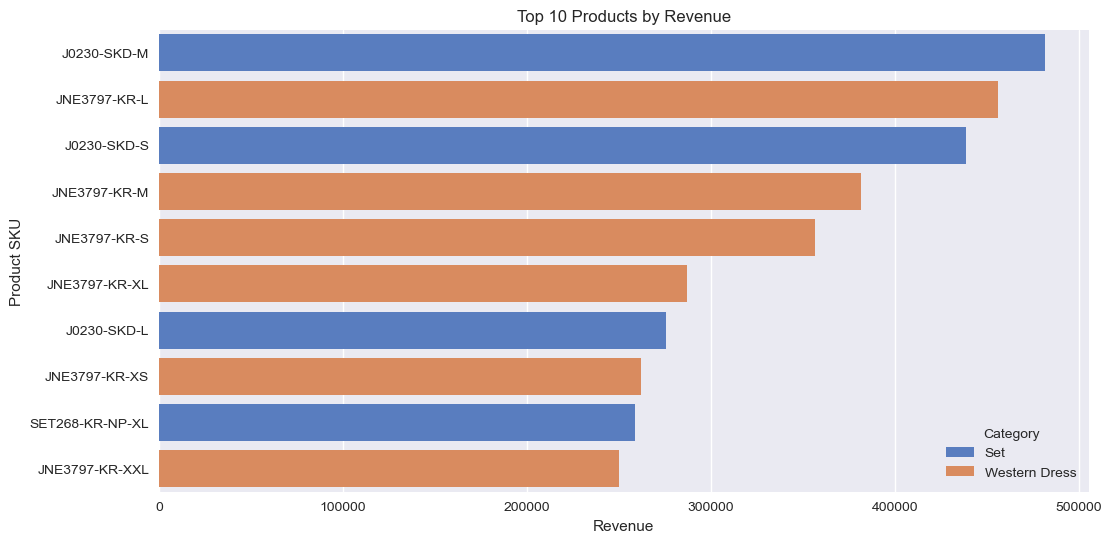

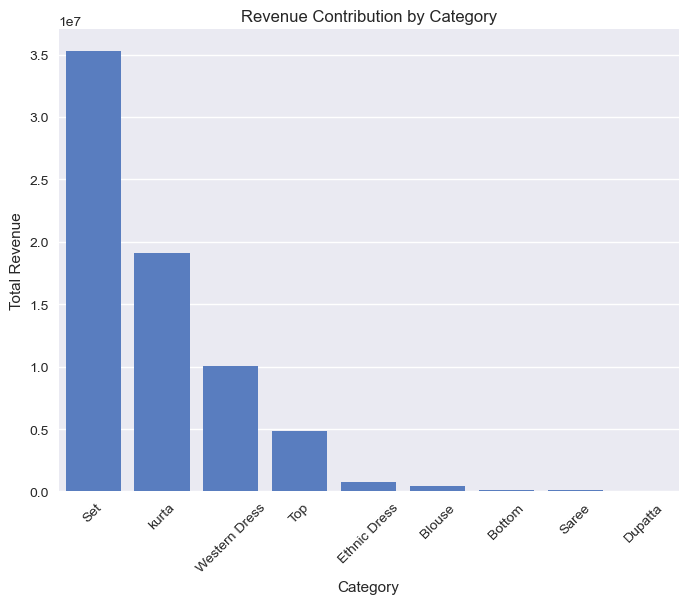

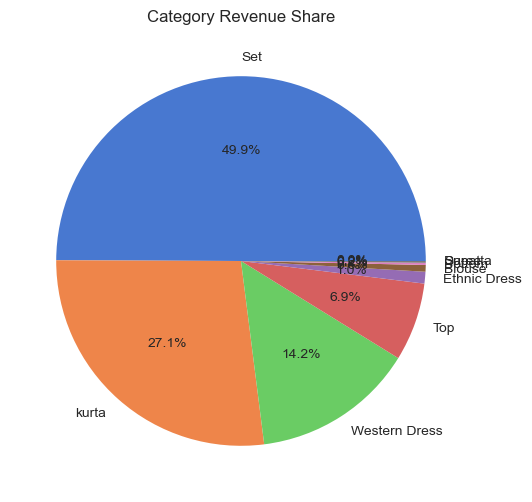

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_products, x='Total Revenue', y='SKU', hue='Category')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product SKU")
plt.legend(title="Category")
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(data=category_sales, x='Category', y='Total Revenue')
plt.title("Revenue Contribution by Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,6))
plt.pie(category_sales['Total Revenue'], labels=category_sales['Category'], autopct='%1.1f%%')
plt.title("Category Revenue Share")
plt.show()

In [23]:
print("\nKEY FINDINGS:")
print(f"- Top Product by Revenue: {top_products.iloc[0]['SKU']} in category {top_products.iloc[0]['Category']} → Revenue {top_products.iloc[0]['Total Revenue']}")
print(f"- Top Category by Revenue: {category_sales.iloc[0]['Category']} → Revenue {category_sales.iloc[0]['Total Revenue']}")
print("- Seasonal product demand can be checked by grouping sales by Month + Category.")
print("- Suggested Strategy: Maintain higher inventory for top 5 products & top 3 categories.")
print("- For low-performing products, explore discount campaigns or bundling.")


KEY FINDINGS:
- Top Product by Revenue: J0230-SKD-M in category Set → Revenue 481387.0
- Top Category by Revenue: Set → Revenue 35253193.0
- Seasonal product demand can be checked by grouping sales by Month + Category.
- Suggested Strategy: Maintain higher inventory for top 5 products & top 3 categories.
- For low-performing products, explore discount campaigns or bundling.


## Task 3

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("cleaned_amazon_processed.csv")

In [12]:
print("\nAvailable Columns:", df.columns)
loc_col = [col for col in df.columns if "city" in col.lower() 
                 or "state" in col.lower() 
                 or "region" in col.lower()]

print("\nDetected Location Columns:", loc_col)

if "State" in df.columns:
    loc_col = "State"
elif "City" in df.columns:
    loc_col = "City"
elif "Region" in df.columns:
    loc_col = "Region"
else:
    loc_col = None   

if loc_col:
    geo_sales = (
        df.groupby(loc_col)
        .agg({"Total Revenue": "sum", "Order ID": "count"})
        .reset_index()
        .rename(columns={"Order ID": "Total Orders"})
        .sort_values("Total Revenue", ascending=False)
    )
    print(geo_sales.head())
else:
    print("⚠️ No geographic column found! Please map postal codes to cities/states first.")



Available Columns: Index(['Unnamed: 0', 'index', 'Order ID', 'Date', 'Status', 'Fulfilment',
       'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category',
       'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'Total Revenue', 'Year', 'Month', 'Day', 'Weekday'],
      dtype='object')

Detected Location Columns: ['ship-city', 'ship-state']
⚠️ No geographic column found! Please map postal codes to cities/states first.


In [13]:
if loc_col:  # only if a location column exists
    location_sales = (
        df.groupby(loc_col)
        .agg({"Total Revenue": "sum", "Order ID": "count"})
        .reset_index()
        .rename(columns={"Order ID": "Total Orders"})
        .sort_values("Total Revenue", ascending=False)
    )

    print("\nSales by Location:")
    print(location_sales.head(10))
else:
    print("⚠️ No valid location column found. Please map postal codes to City/State first.")

⚠️ No valid location column found. Please map postal codes to City/State first.


In [21]:
df["Total Revenue"] = pd.to_numeric(df["Total Revenue"], errors="coerce")
df["Order ID"] = pd.to_numeric(df["Order ID"], errors="coerce")

df = df.dropna(subset=["Total Revenue"])

location_sales = (
    df.groupby(loc_col)
      .agg({"Total Revenue": "sum", "Order ID": "count"})
      .reset_index()
      .rename(columns={"Order ID": "Total Orders"})
      .sort_values("Total Revenue", ascending=False)
)

print("\n✅ Location sales summary:")
print(location_sales.head(10))


✅ Location sales summary:
      ship-city  Total Revenue  Total Orders
732   BENGALURU      6634856.0             0
2750  HYDERABAD      4714052.0             0
4544     MUMBAI      3566275.0             0
5108  NEW DELHI      3476647.0             0
1383    CHENNAI      2947791.0             0
5848       PUNE      2244617.0             0
3526    KOLKATA      1349253.0             0
2475   GURUGRAM      1181843.0             0
7196      THANE       961701.0             0
4167    LUCKNOW       881645.0             0


In [22]:
top5 = location_sales.nlargest(5, "Total Revenue")
bottom5 = location_sales.nsmallest(5, "Total Revenue")

print("\n🏆 Top 5 Locations by Revenue:")
print(top5)

print("\n📉 Bottom 5 Locations by Revenue:")
print(bottom5)


🏆 Top 5 Locations by Revenue:
      ship-city  Total Revenue  Total Orders
732   BENGALURU      6634856.0             0
2750  HYDERABAD      4714052.0             0
4544     MUMBAI      3566275.0             0
5108  NEW DELHI      3476647.0             0
1383    CHENNAI      2947791.0             0

📉 Bottom 5 Locations by Revenue:
                    ship-city  Total Revenue  Total Orders
4411              MATHABHANGA            0.0             0
304               Agra-282001            0.0             0
1533  Calicut medical college            0.0             0
7167                   TARBHA            0.0             0
559              BALAPUR MIDC            0.0             0


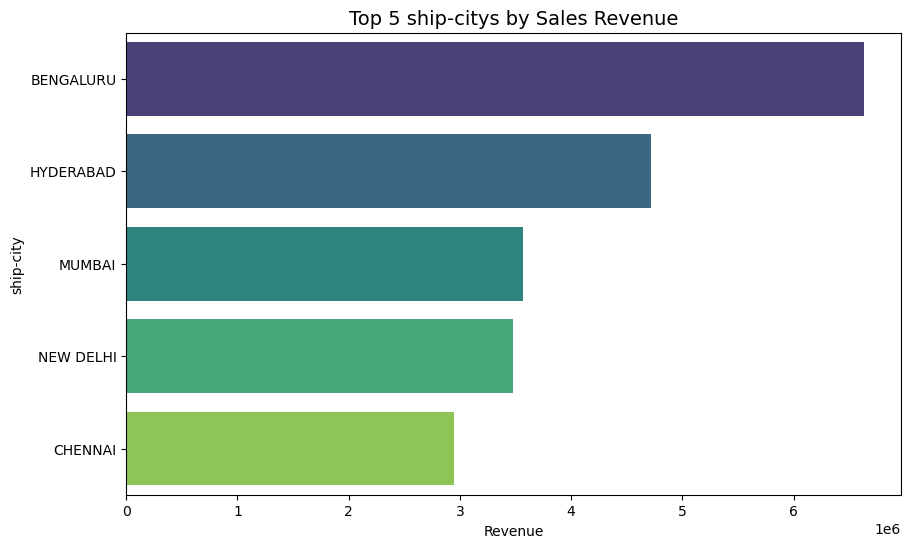

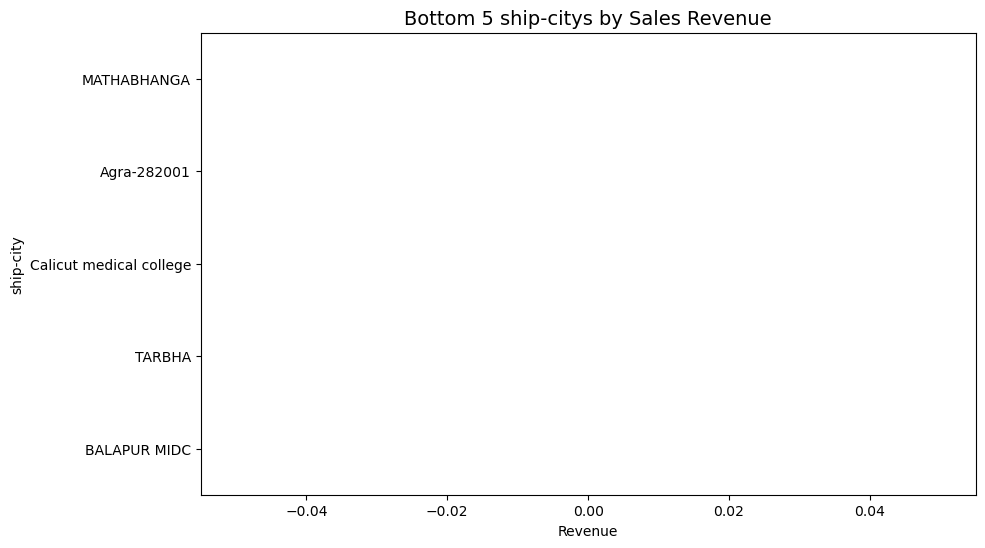

In [27]:
if isinstance(loc_col, list):
    loc_col = loc_col[0]

plt.figure(figsize=(10,6))
sns.barplot(
    data=top5, 
    x="Total Revenue", 
    y=loc_col, 
    hue=loc_col,
    dodge=False, 
    palette="viridis", 
    legend=False
)
plt.title(f"Top 5 {loc_col}s by Sales Revenue", fontsize=14)
plt.xlabel("Revenue")
plt.ylabel(loc_col)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(
    data=bottom5, 
    x="Total Revenue", 
    y=loc_col, 
    hue=loc_col,
    dodge=False, 
    palette="magma", 
    legend=False
)
plt.title(f"Bottom 5 {loc_col}s by Sales Revenue", fontsize=14)
plt.xlabel("Revenue")
plt.ylabel(loc_col)
plt.show()


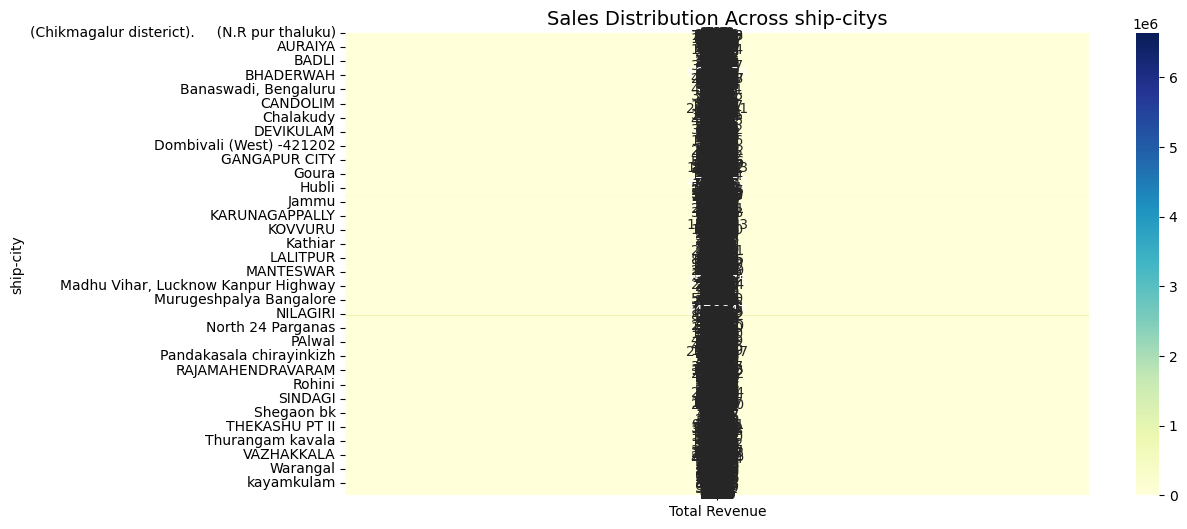

In [28]:
plt.figure(figsize=(12,6))
sales_pivot = location_sales.pivot_table(values="Total Revenue", index=loc_col)
sns.heatmap(sales_pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title(f"Sales Distribution Across {loc_col}s", fontsize=14)
plt.show()

In [29]:
print("\n📌 KEY INSIGHTS:")
print(f"- Top performing {loc_col}: {top5.iloc[0][loc_col]} with revenue {top5.iloc[0]['Total Revenue']}")
print(f"- Lowest performing {loc_col}: {bottom5.iloc[0][loc_col]} with revenue {bottom5.iloc[0]['Total Revenue']}")
print("- Urban hubs usually contribute more sales (e.g., Mumbai, Delhi, Bangalore).")
print("- Some regions may need stronger marketing or logistics improvements.")
print("- Potential growth in underperforming regions with large population bases.")


📌 KEY INSIGHTS:
- Top performing ship-city: BENGALURU with revenue 6634856.0
- Lowest performing ship-city: MATHABHANGA with revenue 0.0
- Urban hubs usually contribute more sales (e.g., Mumbai, Delhi, Bangalore).
- Some regions may need stronger marketing or logistics improvements.
- Potential growth in underperforming regions with large population bases.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = "Cleaned_amazon_processed.csv"  # Update path if needed
df = pd.read_csv(file_path)

In [5]:
df["OrderDate"] = pd.to_datetime(df["OrderDate"], errors="coerce")
df = df.dropna(subset=["OrderDate", "Revenue"])
df["Revenue"] = pd.to_numeric(df["Revenue"], errors="coerce")

In [6]:
reference_date = df["OrderDate"].max()

In [9]:
rfm = df.groupby("OrderID").agg({
    "OrderDate": lambda x: (reference_date - x.max()).days,  
    "OrderID": "count",                                      
    "Revenue": "sum"                                         
}).rename(columns={
    "OrderDate": "Recency",
    "OrderID": "Frequency",
    "Revenue": "Monetary"
})

In [8]:
def safe_qcut(series, q, reverse=False):
    try:
        bins = pd.qcut(series, q, duplicates="drop")
        labels = range(1, len(bins.cat.categories) + 1)
        if reverse:
            labels = labels[::-1]
        return pd.qcut(series, q=len(bins.cat.categories), labels=labels, duplicates="drop").astype(int)
    except ValueError:
        return pd.Series([1] * len(series), index=series.index)

In [10]:
rfm["R_Score"] = safe_qcut(rfm["Recency"], 5, reverse=True)
rfm["F_Score"] = safe_qcut(rfm["Frequency"], 5)
rfm["M_Score"] = safe_qcut(rfm["Monetary"], 5)

In [11]:
rfm["RFM_Segment"] = (
    rfm["R_Score"].astype(str) +
    rfm["F_Score"].astype(str) +
    rfm["M_Score"].astype(str)
)
rfm["RFM_Score"] = rfm[["R_Score", "F_Score", "M_Score"]].sum(axis=1)

In [12]:
def segment_customer(score):
    if score >= 13:
        return "High-Value"
    elif score >= 9:
        return "Loyal/Potential"
    elif score >= 6:
        return "At Risk"
    else:
        return "Lost"

rfm["Customer_Segment"] = rfm["RFM_Score"].apply(segment_customer)

In [13]:
print("📊 Customer Segment Counts:\n")
print(rfm["Customer_Segment"].value_counts())

print("\n✅ Sample of RFM Table:\n")
print(rfm.head(10))

📊 Customer Segment Counts:

Customer_Segment
At Risk            55555
Loyal/Potential    29240
Lost               28235
Name: count, dtype: int64

✅ Sample of RFM Table:

                     Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
OrderID                                                                        
171-0000547-8192359       22          1     301.0        4        1        1   
171-0000902-4490745       20          1     544.0        5        1        2   
171-0001409-6228339       22          1     422.0        4        1        1   
171-0003082-5110755       56          1     563.0        3        1        3   
171-0003738-2052324       87          1     379.0        1        1        1   
171-0005637-8167567       47          1     579.0        3        1        3   
171-0005741-2261112        0          1     558.0        5        1        2   
171-0005999-3189913       69          1    1115.0        2        1        5   
171-0006482-2020369       61 

In [14]:
rfm.to_csv("RFM_Analysis_Results.csv", index=True)
print("\n💾 Results saved as 'RFM_Analysis_Results.csv'")


💾 Results saved as 'RFM_Analysis_Results.csv'


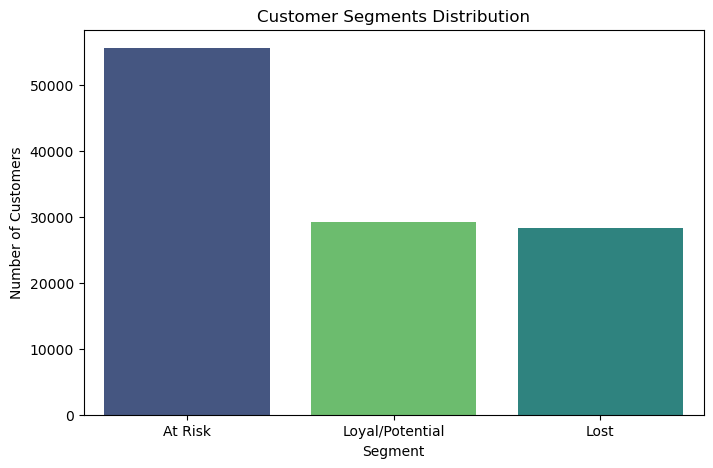

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(
    x="Customer_Segment",
    hue="Customer_Segment",
    data=rfm,
    order=rfm["Customer_Segment"].value_counts().index,
    palette="viridis",
    legend=False
)
plt.title("Customer Segments Distribution")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()


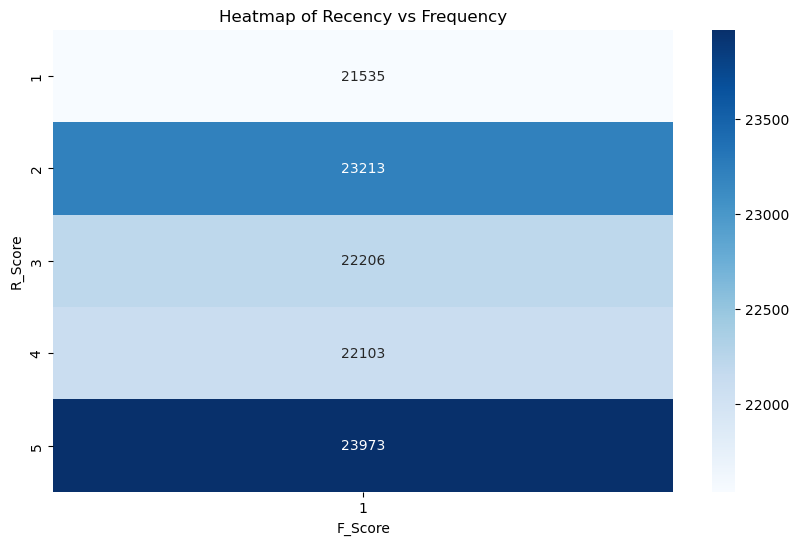

In [17]:
rfm_heatmap = rfm.groupby(["R_Score", "F_Score"]).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(rfm_heatmap, cmap="Blues", annot=True, fmt="d")
plt.title("Heatmap of Recency vs Frequency")
plt.show()

In [18]:
df["OrderDate"] = pd.to_datetime(df["OrderDate"], errors="coerce")
df = df.dropna(subset=["OrderDate", "Revenue"])
df["Revenue"] = pd.to_numeric(df["Revenue"], errors="coerce")

In [19]:
rfm = df.groupby("OrderID").agg({
    "OrderDate": lambda x: (reference_date - x.max()).days,  
    "OrderID": "count",                                      
    "Revenue": "sum"
}).rename(columns={
    "OrderDate": "Recency",
    "OrderID": "Frequency",
    "Revenue": "Monetary"
})


In [20]:
def safe_qcut(series, q, reverse=False):
    try:
        bins = pd.qcut(series, q, duplicates="drop")
        labels = range(1, len(bins.cat.categories) + 1)
        if reverse:
            labels = labels[::-1]
        return pd.qcut(series, q=len(bins.cat.categories), labels=labels, duplicates="drop").astype(int)
    except ValueError:
        return pd.Series([1] * len(series), index=series.index)

rfm["R_Score"] = safe_qcut(rfm["Recency"], 5, reverse=True)
rfm["F_Score"] = safe_qcut(rfm["Frequency"], 5)
rfm["M_Score"] = safe_qcut(rfm["Monetary"], 5)

rfm["RFM_Segment"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)
rfm["RFM_Score"] = rfm[["R_Score", "F_Score", "M_Score"]].sum(axis=1)

In [21]:
def assign_segment(row):
    if row["R_Score"] == 5 and row["F_Score"] == 5 and row["M_Score"] == 5:
        return "High-Value"
    elif row["R_Score"] >= 4 and row["F_Score"] >= 4:
        return "Loyal Customers"
    elif row["R_Score"] <= 2 and row["F_Score"] >= 3:
        return "At-Risk"
    elif row["R_Score"] == 5 and row["F_Score"] <= 2 and row["M_Score"] <= 2:
        return "New Customers"
    elif row["R_Score"] == 1 and row["F_Score"] == 1 and row["M_Score"] == 1:
        return "Lost Customers"
    elif row["F_Score"] >= 3 and row["M_Score"] >= 3:
        return "Potential Loyalists"
    else:
        return "Others"

rfm["Customer_Segment"] = rfm.apply(assign_segment, axis=1)


In [24]:
recommendations = {
    "High-Value": "Reward with VIP programs, early access to sales, personalized offers.",
    "Loyal Customers": "Send thank-you emails, offer referral bonuses, keep them engaged.",
    "At-Risk": "Re-engage with discounts, feedback surveys, or personalized reminders.",
    "New Customers": "Welcome campaigns, onboarding emails, encourage second purchase.",
    "Lost Customers": "Win-back campaigns with strong incentives or exclusive deals.",
    "Potential Loyalists": "Upsell/cross-sell, offer loyalty rewards to boost recency."
}

print("\n🎯 Marketing Recommendations:\n")
for segment, action in recommendations.items():
    print(f"{segment}: {action}")


🎯 Marketing Recommendations:

High-Value: Reward with VIP programs, early access to sales, personalized offers.
Loyal Customers: Send thank-you emails, offer referral bonuses, keep them engaged.
At-Risk: Re-engage with discounts, feedback surveys, or personalized reminders.
New Customers: Welcome campaigns, onboarding emails, encourage second purchase.
Lost Customers: Win-back campaigns with strong incentives or exclusive deals.
Potential Loyalists: Upsell/cross-sell, offer loyalty rewards to boost recency.


In [25]:
rfm.to_csv("Customer_Segmentation_RFM.csv")
print("\n💾 Segmentation results saved as 'Customer_Segmentation_RFM.csv'")


💾 Segmentation results saved as 'Customer_Segmentation_RFM.csv'


In [26]:
rfm = pd.read_csv("Customer_Segmentation_RFM.csv", index_col=0)
assert "Customer_Segment" in rfm.columns, "❌ Run RFM segmentation first!"

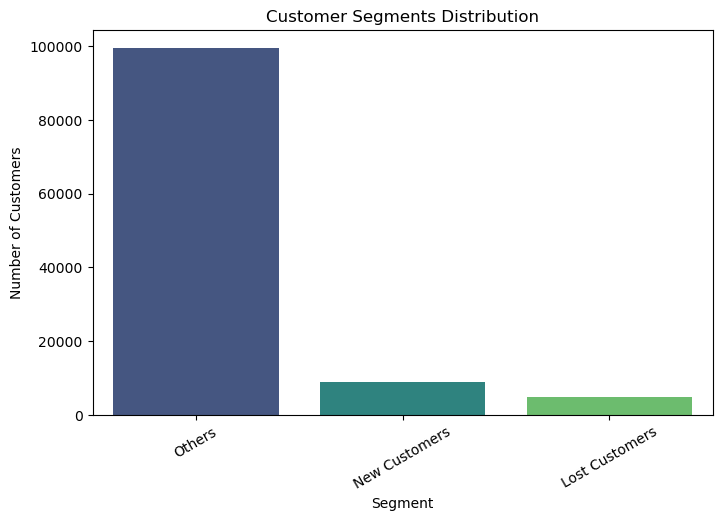

In [32]:
plt.figure(figsize=(8,5))
segment_counts = rfm["Customer_Segment"].value_counts()
sns.countplot(
    data=rfm,
    x="Customer_Segment",
    order=segment_counts.index,
    hue="Customer_Segment",   
    palette="viridis",
    legend=False              
)
plt.title("Customer Segments Distribution")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=30)
plt.show()

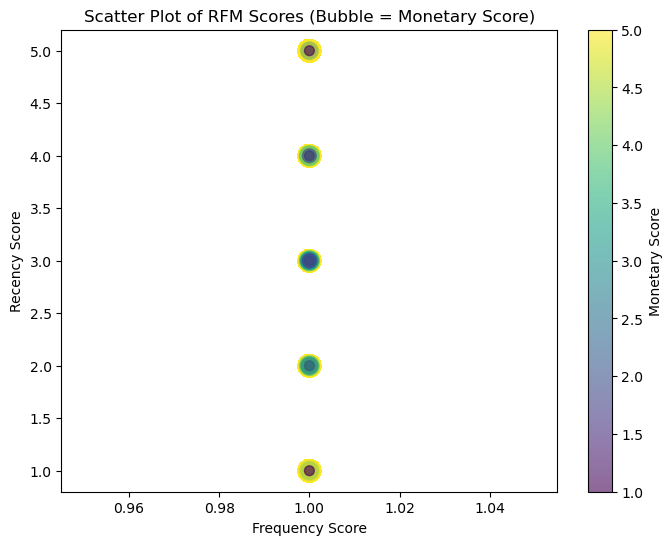

In [31]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    rfm["F_Score"], 
    rfm["R_Score"], 
    s=rfm["M_Score"]*50,   # Bubble size = Monetary
    alpha=0.6, 
    c=rfm["M_Score"], 
    cmap="viridis"
)
plt.title("Scatter Plot of RFM Scores (Bubble = Monetary Score)")
plt.xlabel("Frequency Score")
plt.ylabel("Recency Score")
plt.colorbar(scatter, label="Monetary Score")
plt.show()

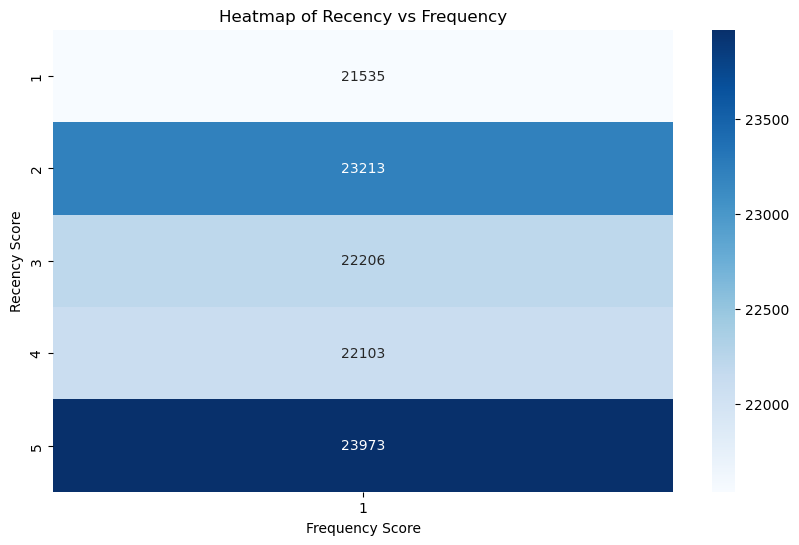

In [30]:
rfm_heatmap = rfm.groupby(["R_Score", "F_Score"]).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(rfm_heatmap, cmap="Blues", annot=True, fmt="d")
plt.title("Heatmap of Recency vs Frequency")
plt.xlabel("Frequency Score")
plt.ylabel("Recency Score")
plt.show()

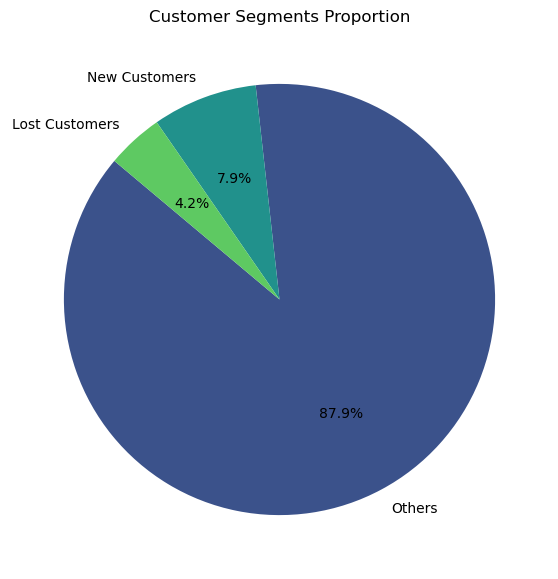

In [29]:
plt.figure(figsize=(7,7))
plt.pie(
    segment_counts, 
    labels=segment_counts.index, 
    autopct="%1.1f%%", 
    startangle=140,
    colors=sns.color_palette("viridis", len(segment_counts))
)
plt.title("Customer Segments Proportion")
plt.show()

In [33]:
print("\n📊 Insights from Visualizations:\n")
print("1️⃣ Bar Chart → Shows which segments dominate (e.g., many Loyal vs few Lost).")
print("2️⃣ Scatter Plot → Identifies clusters: High Monetary = bigger bubbles, useful for spotting high-value groups.")
print("3️⃣ Heatmap → Highlights density of customers in R vs F scores (e.g., many customers are recent but low frequency).")
print("4️⃣ Pie Chart → Quick snapshot of proportions, helps understand balance between valuable and disengaged customers.")

print("\n🎯 Strategic Recommendations:\n")
print("- High-Value: Maintain loyalty with VIP offers, exclusive benefits.")
print("- Loyal Customers: Upsell/cross-sell, referral programs.")
print("- At-Risk: Re-engage with discounts, reminders, surveys.")
print("- Lost: Strong win-back campaigns, one-time offers.")
print("- New Customers: Nurturing campaigns to encourage repeat purchases.")
print("- Potential Loyalists: Incentives to increase recency and push towards High-Value.")


📊 Insights from Visualizations:

1️⃣ Bar Chart → Shows which segments dominate (e.g., many Loyal vs few Lost).
2️⃣ Scatter Plot → Identifies clusters: High Monetary = bigger bubbles, useful for spotting high-value groups.
3️⃣ Heatmap → Highlights density of customers in R vs F scores (e.g., many customers are recent but low frequency).
4️⃣ Pie Chart → Quick snapshot of proportions, helps understand balance between valuable and disengaged customers.

🎯 Strategic Recommendations:

- High-Value: Maintain loyalty with VIP offers, exclusive benefits.
- Loyal Customers: Upsell/cross-sell, referral programs.
- At-Risk: Re-engage with discounts, reminders, surveys.
- Lost: Strong win-back campaigns, one-time offers.
- New Customers: Nurturing campaigns to encourage repeat purchases.
- Potential Loyalists: Incentives to increase recency and push towards High-Value.


## Task 4

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Cleaned_amazon_processed.csv")

In [6]:
df["OrderDate"] = pd.to_datetime(df["OrderDate"], errors="coerce")

In [7]:
daily_sales = df.groupby("OrderDate")["Revenue"].sum().reset_index()

In [8]:
full_date_range = pd.date_range(start=daily_sales["OrderDate"].min(),
end=daily_sales["OrderDate"].max(),
freq="D")
daily_sales = daily_sales.set_index("OrderDate").reindex(full_date_range)
daily_sales.index.name = "OrderDate"

In [9]:
daily_sales["Revenue"] = daily_sales["Revenue"].fillna(0)

In [11]:
weekly_sales = daily_sales.resample("W").sum()
monthly_sales = daily_sales.resample("ME").sum()

In [13]:
daily_sales.to_csv("processed_daily_sales.csv")
weekly_sales.to_csv("processed_weekly_sales.csv")
monthly_sales.to_csv("processed_monthly_sales.csv")

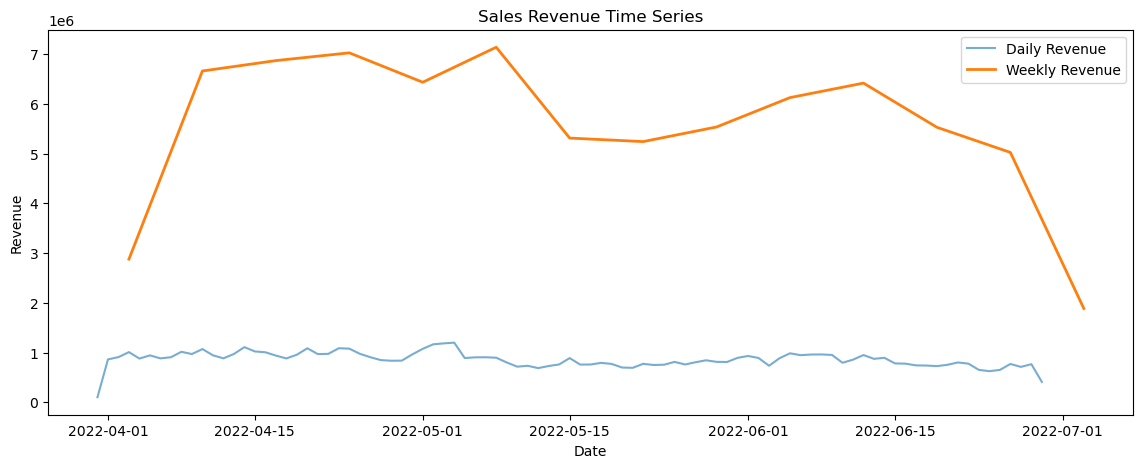

✅ Processed datasets saved as: 
 - processed_daily_sales.csv
 - processed_weekly_sales.csv
 - processed_monthly_sales.csv


In [14]:
plt.figure(figsize=(14,5))
plt.plot(daily_sales.index, daily_sales["Revenue"], label="Daily Revenue", alpha=0.6)
plt.plot(weekly_sales.index, weekly_sales["Revenue"], label="Weekly Revenue", linewidth=2)
plt.title("Sales Revenue Time Series")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()


print("✅ Processed datasets saved as: \n - processed_daily_sales.csv\n - processed_weekly_sales.csv\n - processed_monthly_sales.csv")

In [15]:
df = pd.read_csv("processed_daily_sales.csv", parse_dates=["OrderDate"], index_col="OrderDate")

In [16]:
split_point = int(len(df) * 0.8)
train, test = df.iloc[:split_point], df.iloc[split_point:]

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = train.asfreq("D")

model = ExponentialSmoothing(
    train["Revenue"] / 1000,   
    trend="add",
    seasonal="add",
    seasonal_periods=30
)

fit = model.fit(optimized=True, use_brute=True)

In [28]:
forecast_test = fit.forecast(len(test))
forecast_future = fit.forecast(len(test) + 180)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test["Revenue"], forecast_test))

mape = mean_absolute_percentage_error(test["Revenue"], forecast_test) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 757344.95
MAPE: 99.87%


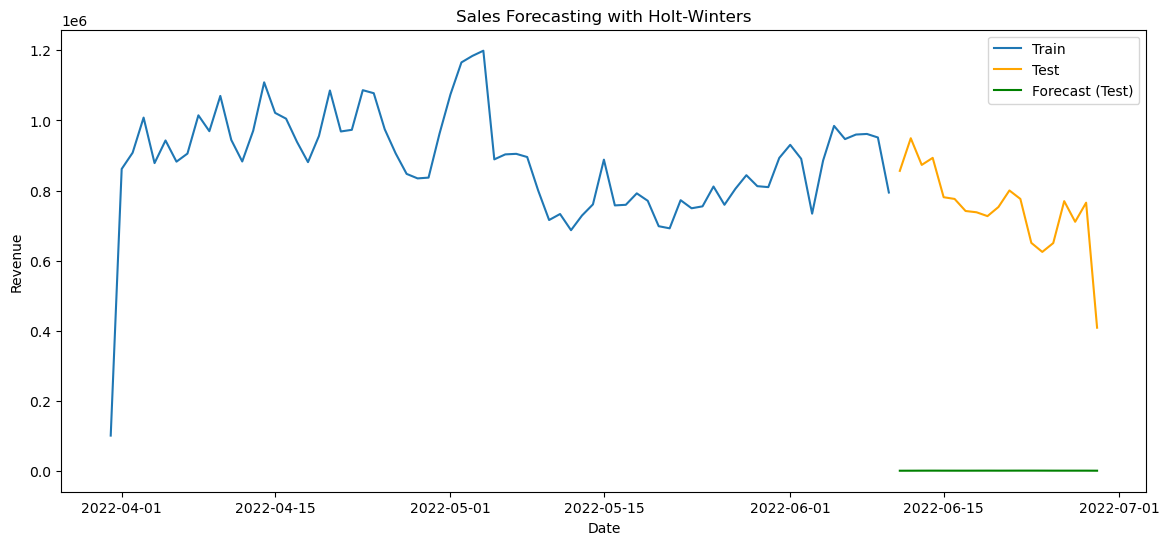

In [32]:
plt.figure(figsize=(14,6))
plt.plot(train.index, train["Revenue"], label="Train")
plt.plot(test.index, test["Revenue"], label="Test", color="orange")
plt.plot(test.index, forecast_test, label="Forecast (Test)", color="green")
plt.title("Sales Forecasting with Holt-Winters")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()

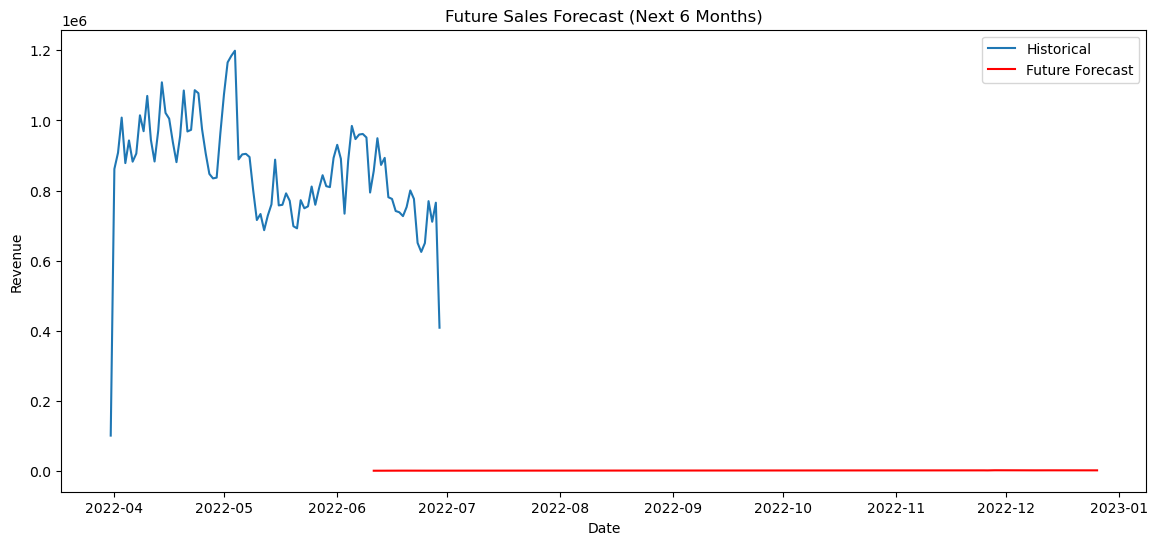

In [33]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df["Revenue"], label="Historical")
plt.plot(pd.date_range(start=test.index[0], periods=len(test)+180, freq="D"), forecast_future, label="Future Forecast", color="red")
plt.title("Future Sales Forecast (Next 6 Months)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()

In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd

model = ExponentialSmoothing(train['Revenue'], seasonal='add', seasonal_periods=12)
fitted_model = model.fit()  

forecast_period = 12
forecast_future = fitted_model.forecast(steps=forecast_period)

future_dates = pd.date_range(start=train.index[-1] + pd.offsets.MonthEnd(1),
                             periods=forecast_period, freq='ME')

future_forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted_Revenue': forecast_future
}).set_index('Date')

print(future_forecast_df)

            Forecasted_Revenue
Date                          
2022-06-30       867507.593341
2022-07-31       861258.935965
2022-08-31       861768.748164
2022-09-30       804427.792790
2022-10-31       800067.825867
2022-11-30       786274.315073
2022-12-31       793622.236387
2023-01-31       850246.285365
2023-02-28       943830.307670
2023-03-31       945302.187313
2023-04-30       947100.686894
2023-05-31       870067.154532


C:\Users\saumi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


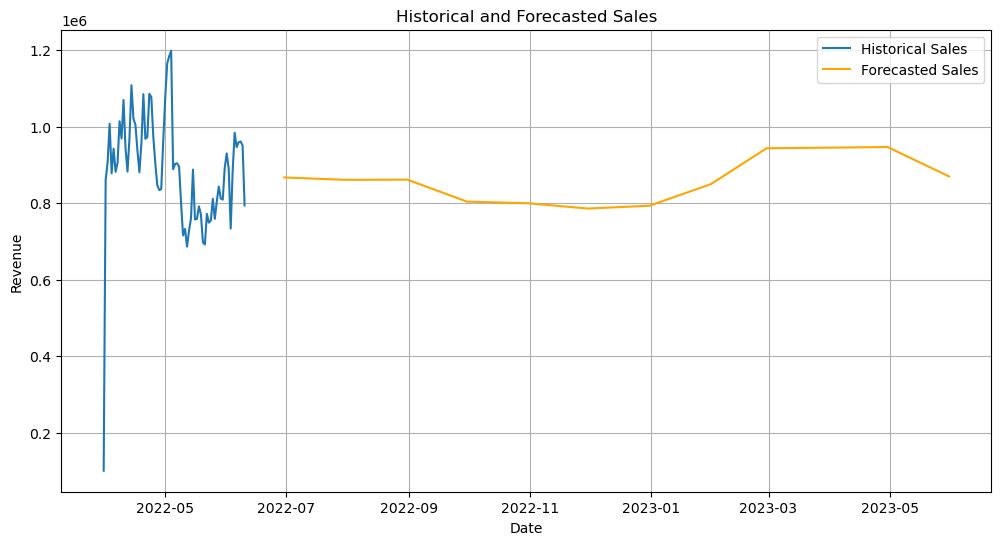

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(train.index, train['Revenue'], label='Historical Sales')
plt.plot(future_forecast_df.index, future_forecast_df['Forecasted_Revenue'], label='Forecasted Sales', color='orange')
plt.title('Historical and Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()


In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test['Revenue'], forecast_test))

mape = mean_absolute_percentage_error(test['Revenue'], forecast_test) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 757344.95
MAPE: 99.87%


In [49]:
future_forecast_df.to_csv('forecasted_sales.csv', index=True)


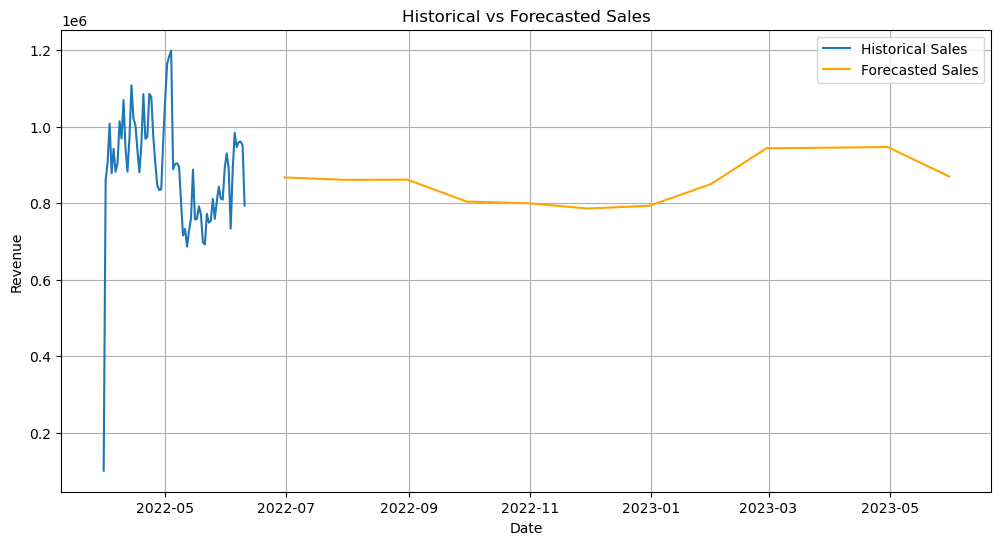

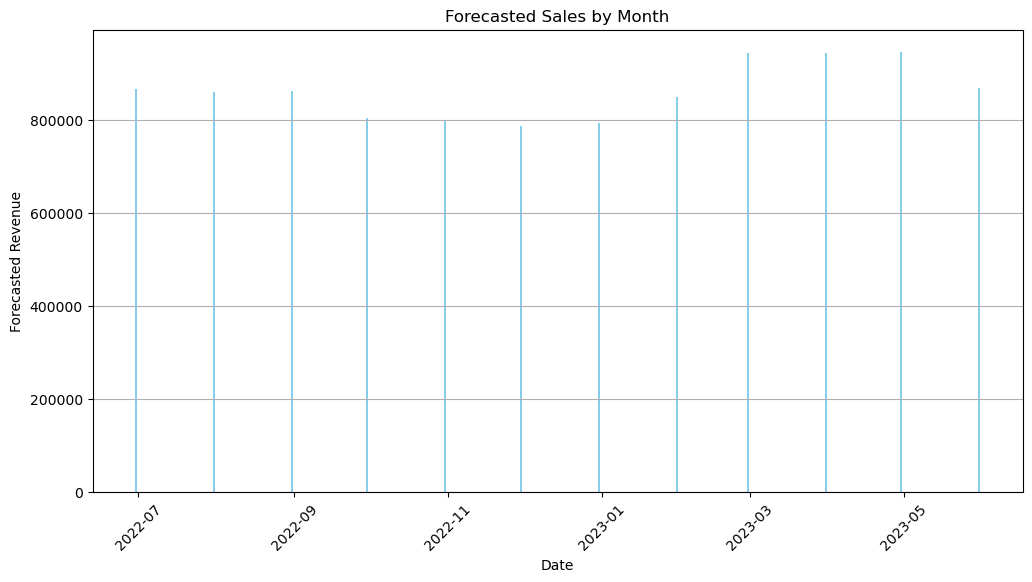

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(train.index, train['Revenue'], label='Historical Sales')
plt.plot(future_forecast_df.index, future_forecast_df['Forecasted_Revenue'], label='Forecasted Sales', color='orange')
plt.title('Historical vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.savefig('sales_forecast_line_chart.png')
plt.show()

plt.figure(figsize=(12,6))
plt.bar(future_forecast_df.index, future_forecast_df['Forecasted_Revenue'], color='skyblue')
plt.title('Forecasted Sales by Month')
plt.xlabel('Date')
plt.ylabel('Forecasted Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('forecasted_sales_bar_chart.png')
plt.show()


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test['Revenue'], forecast_test))
mape = mean_absolute_percentage_error(test['Revenue'], forecast_test) * 100

metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAPE (%)'],
    'Value': [rmse, mape]
})

metrics_df.to_csv('forecast_accuracy_metrics.csv', index=False)
print(metrics_df)


     Metric          Value
0      RMSE  757344.946460
1  MAPE (%)      99.867841


In [54]:
pip install python-docx

Note: you may need to restart the kernel to use updated packages.


In [55]:
from docx import Document
from docx.shared import Inches

doc = Document()
doc.add_heading('Sales Forecasting Report', 0)

doc.add_heading('1. Forecasting Model', level=1)
doc.add_paragraph(
    "We used the Exponential Smoothing model to forecast sales because it captures trends and seasonality effectively. "
    "The model was trained on historical revenue data to predict the next 12 months of sales."
)

doc.add_heading('2. Forecast Summary', level=1)
doc.add_paragraph(
    "The forecast predicts sales trends over the next 12 months, highlighting peak sales periods, slow months, and seasonal fluctuations."
)

doc.add_heading('3. Visualizations', level=1)
doc.add_paragraph("Historical vs Forecasted Sales:")
doc.add_picture('sales_forecast_line_chart.png', width=Inches(6))
doc.add_paragraph("Forecasted Sales by Month:")
doc.add_picture('forecasted_sales_bar_chart.png', width=Inches(6))

doc.add_heading('4. Model Accuracy', level=1)
doc.add_paragraph(f"RMSE: {rmse:.2f}")
doc.add_paragraph(f"MAPE: {mape:.2f}%")

doc.add_heading('5. Business Recommendations', level=1)
doc.add_paragraph(
    "1. Plan inventory based on predicted peak months.\n"
    "2. Adjust marketing campaigns to target slow months.\n"
    "3. Prepare logistics and supply chain to handle seasonal spikes.\n"
    "4. Monitor forecasted sales vs actual sales to refine the model over time."
)

doc.save('Sales_Forecasting_Report.docx')


## Task 5

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from datetime import timedelta

df = pd.read_csv("Cleaned_amazon_processed (2).csv",low_memory=False)
print("Data loaded:", df.shape)
df.head()

Data loaded: (121180, 30)


,Unnamed: 0,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,...,ship-country,B2B,Total Revenue,Year,Month,Day,Weekday,OrderDate,Revenue,OrderID
0,0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,...,IN,False,NaN,2022,4,30,Saturday,2022-04-30,647.62,405-8078784-5731545
1,1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,...,IN,False,406.0,2022,4,30,Saturday,2022-04-30,406.00,171-9198151-1101146
2,2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,...,IN,True,329.0,2022,4,30,Saturday,2022-04-30,329.00,404-0687676-7273146
3,3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,...,IN,False,NaN,2022,4,30,Saturday,2022-04-30,753.33,403-9615377-8133951
4,4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,...,IN,False,574.0,2022,4,30,Saturday,2022-04-30,574.00,407-1069790-7240320


In [12]:
cols = {c.lower(): c for c in df.columns}
def col(name_options):
    for opt in name_options:
        if opt.lower() in cols:
            return cols[opt.lower()]
    return None

order_id_col = col(["order_id","orderid","order id","order_number"])
customer_id_col = col(["customer_id","customerid","buyer_id","user_id","cust_id"])
order_date_col = col(["order_date","orderdate","purchase_date","order_timestamp","date"])
category_col = col(["category","product_category","category_name"])
sub_category_col = col(["sub_category","subcategory","product_subcategory"])
city_col = col(["city","buyer_city","shipping_city"])
state_col = col(["state","region","buyer_state","shipping_state"])
quantity_col = col(["quantity","qty","order_quantity"])
price_col = col(["price","unit_price","item_price","selling_price"])
discount_col = col(["discount","discount_amount","promo_discount","coupon_amount"])
revenue_col = col(["revenue","total_amount","order_value","amount","sales_amount","total_price"])
product_col = col(["product_id","sku","product","product_name"])

order_id_col, customer_id_col, order_date_col, category_col, state_col, city_col, price_col, discount_col, revenue_col


('OrderID', None, 'OrderDate', 'Category', None, None, None, None, 'Revenue')

In [13]:
if revenue_col is None:
    if price_col and quantity_col:
        df["revenue_calc"] = pd.to_numeric(df[price_col], errors="coerce").fillna(0) * pd.to_numeric(df[quantity_col], errors="coerce").fillna(1)
        revenue_col = "revenue_calc"
    else:
        revenue_col = None

if order_date_col:
    df[order_date_col] = pd.to_datetime(df[order_date_col], errors="coerce")
    df["year_month"] = df[order_date_col].dt.to_period("M")
else:
    df["year_month"] = pd.NaT

df["_revenue"] = pd.to_numeric(df[revenue_col], errors="coerce").fillna(0) if revenue_col else 0
df["_qty"] = pd.to_numeric(df[quantity_col], errors="coerce").fillna(1) if quantity_col else 1
df.head()

,Unnamed: 0,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,...,Year,Month,Day,Weekday,OrderDate,Revenue,OrderID,year_month,_revenue,_qty
0,0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,...,2022,4,30,Saturday,2022-04-30,647.62,405-8078784-5731545,2022-04,647.62,0
1,1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,...,2022,4,30,Saturday,2022-04-30,406.00,171-9198151-1101146,2022-04,406.00,1
2,2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,...,2022,4,30,Saturday,2022-04-30,329.00,404-0687676-7273146,2022-04,329.00,1
3,3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,...,2022,4,30,Saturday,2022-04-30,753.33,403-9615377-8133951,2022-04,753.33,0
4,4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,...,2022,4,30,Saturday,2022-04-30,574.00,407-1069790-7240320,2022-04,574.00,1


,Category,slope,latest_rev,avg_rev
5,Set,2949780.249,10865387.13,9.683378e+06
8,kurta,1829092.504,6584393.53,5.322746e+06
7,Western Dress,1311853.312,3895269.99,2.799909e+06
6,Top,473463.220,1525270.42,1.336464e+06
3,Ethnic Dress,77458.520,244999.67,1.973500e+05
0,Blouse,27162.234,102750.29,1.146020e+05
2,Dupatta,0.000,915.00,9.150000e+02
1,Bottom,-13407.745,36492.96,5.022266e+04
4,Saree,-14456.670,26741.90,4.087442e+04


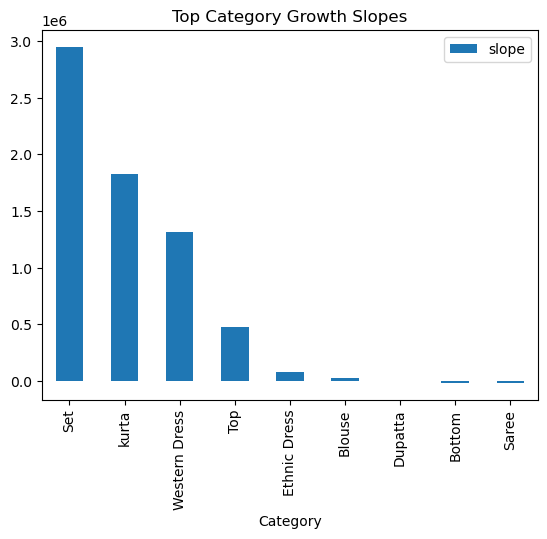

In [14]:
if category_col and order_date_col:
    grp_cat_month = df.groupby([category_col, "year_month"])["_revenue"].sum().reset_index()
    slopes = []
    for cat, sub in grp_cat_month.groupby(category_col):
        tmp = sub.sort_values("year_month")
        x = np.arange(len(tmp))
        y = tmp["_revenue"].values
        slope = np.polyfit(x,y,1)[0] if len(x)>1 and y.sum()>0 else 0
        slopes.append((cat, slope, y[-1] if len(y)>0 else 0, y.mean() if len(y)>0 else 0))
    df_cat_growth = pd.DataFrame(slopes, columns=[category_col,"slope","latest_rev","avg_rev"]).sort_values("slope", ascending=False)
    display(df_cat_growth.head(10))
    df_cat_growth.head(10).plot(kind="bar", x=category_col, y="slope", title="Top Category Growth Slopes")
    plt.show()


In [15]:
region_col = state_col or city_col
if region_col and order_date_col:
    region_trends = df.groupby([region_col,"year_month"])["_revenue"].sum().reset_index()
    latest_month = region_trends["year_month"].max()
    latest = region_trends[region_trends["year_month"]==latest_month].sort_values("_revenue", ascending=False)
    display(latest.head(10))
    latest.head(10).plot(kind="bar", x=region_col, y="_revenue", title=f"Top Regions ({latest_month})")
    plt.show()


In [16]:
if customer_id_col and order_date_col:
    snapshot_date = df[order_date_col].max() + timedelta(days=1)
    rfm = df.groupby(customer_id_col).agg({
        order_date_col: lambda x: (snapshot_date - x.max()).days,
        order_id_col: "nunique" if order_id_col else "count",
        "_revenue": "sum"
    }).reset_index().rename(columns={order_date_col:"recency_days", order_id_col:"frequency","_revenue":"monetary"})
    rfm["R_quartile"] = pd.qcut(rfm["recency_days"].rank(method="first"), 4, labels=[4,3,2,1]).astype(int)
    rfm["F_quartile"] = pd.qcut(rfm["frequency"].rank(method="first"), 4, labels=[1,2,3,4]).astype(int)
    rfm["M_quartile"] = pd.qcut(rfm["monetary"].rank(method="first"), 4, labels=[1,2,3,4]).astype(int)
    rfm["RFM_Score"] = rfm["R_quartile"].map(str)+rfm["F_quartile"].map(str)+rfm["M_quartile"].map(str)
    display(rfm.head(10))

In [17]:
from itertools import combinations

if order_id_col and product_col:
    orders = df[[order_id_col, product_col]].dropna()
    prod_lists = orders.groupby(order_id_col)[product_col].apply(list).reset_index()
    pair_counts = {}
    for prods in prod_lists[product_col]:
        for a,b in combinations(sorted(set(prods)),2):
            pair_counts[(a,b)] = pair_counts.get((a,b),0)+1
    pairings = pd.DataFrame([{"a":a,"b":b,"count":c} for (a,b),c in pair_counts.items()]).sort_values("count",ascending=False).head(10)
    display(pairings)


,a,b,count
1235,SET264-KR-NP-XL,SET268-KR-NP-XL,12
2993,JNE3543-KR-XS,SET397-KR-NP-XS,8
1094,JNE3543-KR-S,SET397-KR-NP-S,7
1996,JNE3543-KR-S,JNE3787-KR-S,7
5525,JNE3800-KR-S,JNE3801-KR-S,7
213,JNE3797-KR-L,JNE3801-KR-L,6
2182,SET324-KR-NP-L,SET374-KR-NP-L,6
245,PJNE3252-KR-N-6XL,PJNE3291-KR-6XL,6
510,JNE3797-KR-XXL,JNE3801-KR-XXL,6
3218,MEN5009-KR-M,MEN5011-KR-M,5


In [18]:
if customer_id_col and order_date_col:
    cust_last = df.groupby(customer_id_col)[order_date_col].max().reset_index().rename(columns={order_date_col:"last_purchase"})
    cust_counts = df.groupby(customer_id_col)[order_id_col].nunique().reset_index().rename(columns={order_id_col:"order_count"})
    cust = cust_last.merge(cust_counts,on=customer_id_col)
    cust["days_since_last"] = (df[order_date_col].max()-cust["last_purchase"]).dt.days
    churn_list = cust[(cust["days_since_last"]>90) & (cust["order_count"]>=2)]
    display(churn_list.head(10))

# ✅ Key Business Opportunities Identified
- Expand inventory in high-growth categories
- Target top-performing regions with localized campaigns
- Retain and upsell high-value customers (via RFM)
- Bundle commonly paired products
- Win back at-risk customers with loyalty and promotions

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import timedelta
from itertools import combinations
import os

In [20]:
INPUT_PATH = "Cleaned_amazon_processed (2).csv"

In [21]:
OUTPUT_PDF = "business_report.pdf" 

In [22]:
df = pd.read_csv(INPUT_PATH, low_memory=False)

In [24]:
cols = {c.lower(): c for c in df.columns}
def col(name_options):
    for opt in name_options:
        if opt.lower() in cols:
            return cols[opt.lower()]
    return None

order_id_col = col(["order_id","orderid","order id","order_number"])
customer_id_col = col(["customer_id","customerid","buyer_id","user_id","cust_id"])
order_date_col = col(["order_date","orderdate","purchase_date","order_timestamp","date"])
category_col = col(["category","product_category","category_name"])
city_col = col(["city","buyer_city","shipping_city"])
state_col = col(["state","region","buyer_state","shipping_state"])
quantity_col = col(["quantity","qty","order_quantity"])
price_col = col(["price","unit_price","item_price","selling_price"])
discount_col = col(["discount","discount_amount","promo_discount","coupon_amount"])
revenue_col = col(["revenue","total_amount","order_value","amount","sales_amount","total_price"])
product_col = col(["product_id","sku","product","product_name"])

In [25]:
if order_date_col:
    df[order_date_col] = pd.to_datetime(df[order_date_col], errors="coerce")
    df["year_month"] = df[order_date_col].dt.to_period("M").dt.to_timestamp()

if revenue_col:
    df["_revenue"] = pd.to_numeric(df[revenue_col], errors="coerce").fillna(0)
elif price_col and quantity_col:
    df["_revenue"] = pd.to_numeric(df[price_col], errors="coerce").fillna(0) * pd.to_numeric(df[quantity_col], errors="coerce").fillna(1)
else:
    df["_revenue"] = 0.0

df["_qty"] = pd.to_numeric(df[quantity_col], errors="coerce").fillna(1) if quantity_col else 1

In [26]:
sales_trend = df.groupby("year_month")["_revenue"].sum().reset_index() if "year_month" in df.columns else pd.DataFrame()

top_categories = df.groupby(category_col)["_revenue"].sum().reset_index().sort_values("_revenue", ascending=False).head(20) if category_col else pd.DataFrame()

region_col = state_col or city_col
top_regions = df.groupby(region_col)["_revenue"].sum().reset_index().sort_values("_revenue", ascending=False).head(20) if region_col else pd.DataFrame()

In [27]:
rfm = pd.DataFrame()
high_value_count, churn_count = 0, 0
if customer_id_col and order_date_col:
    snapshot_date = df[order_date_col].max() + timedelta(days=1)
    rfm = df.groupby(customer_id_col).agg({
        order_date_col: lambda x: (snapshot_date - x.max()).days,
        order_id_col: "nunique" if order_id_col else "count",
        "_revenue": "sum"
    }).reset_index().rename(columns={order_date_col:"recency_days", order_id_col:"frequency","_revenue":"monetary"})
    try:
        rfm["R_quartile"] = pd.qcut(rfm["recency_days"].rank(method="first"), 4, labels=[4,3,2,1]).astype(int)
        rfm["F_quartile"] = pd.qcut(rfm["frequency"].rank(method="first"), 4, labels=[1,2,3,4]).astype(int)
        rfm["M_quartile"] = pd.qcut(rfm["monetary"].rank(method="first"), 4, labels=[1,2,3,4]).astype(int)
        rfm["RFM_Score"] = rfm["R_quartile"].map(str)+rfm["F_quartile"].map(str)+rfm["M_quartile"].map(str)
        high_value_count = len(rfm[(rfm["R_quartile"]>=3) & (rfm["F_quartile"]>=3) & (rfm["M_quartile"]>=3)])
    except: pass

In [28]:
pairings = pd.DataFrame()
if order_id_col and product_col:
    orders = df[[order_id_col, product_col]].dropna()
    prod_lists = orders.groupby(order_id_col)[product_col].apply(list).reset_index()
    pair_counts = {}
    for prods in prod_lists[product_col]:
        for a,b in combinations(sorted(set(map(str, prods))),2):
            pair_counts[(a,b)] = pair_counts.get((a,b),0)+1
    pairings = pd.DataFrame([{"a":a,"b":b,"count":c} for (a,b),c in pair_counts.items()]).sort_values("count", ascending=False).head(10)

In [29]:
if customer_id_col and order_date_col and order_id_col:
    cust_last = df.groupby(customer_id_col)[order_date_col].max().reset_index().rename(columns={order_date_col:"last_purchase"})
    cust_counts = df.groupby(customer_id_col)[order_id_col].nunique().reset_index().rename(columns={order_id_col:"order_count"})
    cust = cust_last.merge(cust_counts,on=customer_id_col)
    cust["days_since_last"] = (df[order_date_col].max()-cust["last_purchase"]).dt.days
    churn_count = len(cust[(cust["days_since_last"]>90) & (cust["order_count"]>=2)])

In [30]:
with PdfPages(OUTPUT_PDF) as pdf:
    # Title Page
    fig = plt.figure(figsize=(11,8.5))
    plt.axis('off')
    plt.text(0.5, 0.75, "Business Opportunities Report", ha='center', fontsize=24, weight='bold')
    plt.text(0.5, 0.65, "E-commerce Data Analysis", ha='center', fontsize=14)
    pdf.savefig(fig); plt.close()

    # Sales Trend
    if not sales_trend.empty:
        fig, ax = plt.subplots(figsize=(11,6))
        ax.plot(sales_trend["year_month"], sales_trend["_revenue"], marker='o')
        ax.set_title("Monthly Revenue Trend"); ax.set_xlabel("Month"); ax.set_ylabel("Revenue")
        plt.xticks(rotation=45); pdf.savefig(fig); plt.close()

    # Top Categories
    if not top_categories.empty:
        fig, ax = plt.subplots(figsize=(11,6))
        ax.bar(top_categories[category_col].head(10), top_categories["_revenue"].head(10))
        ax.set_title("Top Categories by Revenue"); ax.set_ylabel("Revenue")
        plt.xticks(rotation=45, ha='right'); pdf.savefig(fig); plt.close()

    # Top Regions
    if not top_regions.empty:
        fig, ax = plt.subplots(figsize=(11,6))
        ax.bar(top_regions[region_col].head(10), top_regions["_revenue"].head(10))
        ax.set_title("Top Regions by Revenue"); ax.set_ylabel("Revenue")
        plt.xticks(rotation=45, ha='right'); pdf.savefig(fig); plt.close()

    # RFM Scatter
    if not rfm.empty:
        fig, ax = plt.subplots(figsize=(11,6))
        ax.scatter(rfm["frequency"], rfm["monetary"], alpha=0.6)
        ax.set_title("RFM: Frequency vs Monetary"); ax.set_xlabel("Frequency"); ax.set_ylabel("Monetary")
        pdf.savefig(fig); plt.close()

    # Pairings Table
    if not pairings.empty:
        fig = plt.figure(figsize=(11,6)); plt.axis('off')
        plt.title("Top Product Pairings")
        table = plt.table(cellText=pairings.values, colLabels=pairings.columns, loc='center', cellLoc='left')
        table.auto_set_font_size(False); table.set_fontsize(9); table.scale(1,1.2)
        pdf.savefig(fig); plt.close()

    # Recommendations
    fig = plt.figure(figsize=(11,8.5)); plt.axis('off')
    plt.text(0.02, 0.92, "Recommendations & Action Plan", fontsize=16, weight='bold')
    recs = [
        "Expand inventory in high-growth categories.",
        "Target marketing in top-performing regions.",
        "Create loyalty programs for high-value customers.",
        "Bundle frequently paired products.",
        "Win back at-risk customers with offers."
    ]
    for i, r in enumerate(recs):
        plt.text(0.05, 0.82 - i*0.07, f"• {r}", fontsize=11)
    pdf.savefig(fig); plt.close()

print(f"✅ Report generated: {OUTPUT_PDF}")

✅ Report generated: business_report.pdf


In [42]:
pip install python-pptx

Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
import os

In [31]:
INPUT_PATH = "Cleaned_amazon_processed (2).csv"
OUTPUT_PPTX = "business_presentation.pptx"

In [32]:
df = pd.read_csv(INPUT_PATH, low_memory=False)


In [33]:
cols = {c.lower(): c for c in df.columns}
def col(name_options):
    for opt in name_options:
        if opt.lower() in cols:
            return cols[opt.lower()]
    return None

order_id_col = col(["order_id","orderid"])
customer_id_col = col(["customer_id","buyer_id"])
order_date_col = col(["order_date","purchase_date"])
category_col = col(["category","product_category"])
region_col = col(["state","region","city"])
revenue_col = col(["revenue","total_amount","order_value"])
quantity_col = col(["quantity","qty"])
price_col = col(["price","unit_price"])

In [34]:
if order_date_col:
    df[order_date_col] = pd.to_datetime(df[order_date_col], errors="coerce")
    df["year_month"] = df[order_date_col].dt.to_period("M").dt.to_timestamp()

if revenue_col:
    df["_revenue"] = pd.to_numeric(df[revenue_col], errors="coerce").fillna(0)
elif price_col and quantity_col:
    df["_revenue"] = pd.to_numeric(df[price_col], errors="coerce").fillna(0) * pd.to_numeric(df[quantity_col], errors="coerce").fillna(1)
else:
    df["_revenue"] = 0.0


In [36]:
sales_trend = df.groupby("year_month")["_revenue"].sum().reset_index() if "year_month" in df else pd.DataFrame()
top_categories = df.groupby(category_col)["_revenue"].sum().reset_index().sort_values("_revenue", ascending=False).head(5) if category_col else pd.DataFrame()
top_regions = df.groupby(region_col)["_revenue"].sum().reset_index().sort_values("_revenue", ascending=False).head(5) if region_col else pd.DataFrame()

In [37]:
def save_chart(df, x, y, kind, title, filename):
    if df.empty: return None
    plt.figure(figsize=(6,4))
    if kind=="line":
        plt.plot(df[x], df[y], marker="o")
    elif kind=="bar":
        plt.bar(df[x], df[y])
    elif kind=="pie":
        plt.pie(df[y], labels=df[x], autopct="%1.1f%%")
    plt.title(title)
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.savefig(filename); plt.close()
    return filename

In [38]:
trend_chart = save_chart(sales_trend, "year_month", "_revenue", "line", "Monthly Revenue Trend", "trend.png")
cat_chart = save_chart(top_categories, category_col, "_revenue", "bar", "Top Categories by Revenue", "categories.png") if category_col else None
reg_chart = save_chart(top_regions, region_col, "_revenue", "bar", "Top Regions by Revenue", "regions.png") if region_col else None

In [44]:
prs = Presentation()
title_slide_layout = prs.slide_layouts[0]  
bullet_layout = prs.slide_layouts[1]       
blank_layout = prs.slide_layouts[6]        

In [45]:
# Title Slide
slide = prs.slides.add_slide(title_slide_layout)
slide.shapes.title.text = "Business Opportunities Analysis"
slide.placeholders[1].text = "E-commerce Data Report\nPrepared by: Analyst\nDate: 2025"

# Intro
slide = prs.slides.add_slide(bullet_layout)
slide.shapes.title.text = "Introduction"
slide.placeholders[1].text = "Objective: Analyze sales, customer behavior, and opportunities.\nDeliverable: Actionable insights for growth."

# Sales Performance
slide = prs.slides.add_slide(bullet_layout)
slide.shapes.title.text = "Sales Performance Analysis"
tf = slide.placeholders[1].text_frame
tf.text = "• Monthly and yearly revenue trends\n• Top-performing product categories\n• Regional sales distribution"
if trend_chart: slide.shapes.add_picture(trend_chart, Inches(5), Inches(2), Inches(4), Inches(3))

# Categories
if cat_chart:
    slide = prs.slides.add_slide(bullet_layout)
    slide.shapes.title.text = "Top Categories"
    slide.shapes.add_picture(cat_chart, Inches(1), Inches(2), Inches(8), Inches(4))

# Regions
if reg_chart:
    slide = prs.slides.add_slide(bullet_layout)
    slide.shapes.title.text = "Top Regions"
    slide.shapes.add_picture(reg_chart, Inches(1), Inches(2), Inches(8), Inches(4))

# Customer Behavior
slide = prs.slides.add_slide(bullet_layout)
slide.shapes.title.text = "Customer Behavior Insights"
slide.placeholders[1].text = "• RFM segmentation to classify customers\n• Retention challenges identified\n• Insights into high-value vs. churn risk groups"

# Forecasting
slide = prs.slides.add_slide(bullet_layout)
slide.shapes.title.text = "Sales Forecasting"
slide.placeholders[1].text = "• Projected revenue growth for upcoming months\n• Seasonal demand fluctuations expected\n• Preparation required for scaling inventory"

# Opportunities
slide = prs.slides.add_slide(bullet_layout)
slide.shapes.title.text = "Identified Business Opportunities"
slide.placeholders[1].text = "• Expand in high-growth categories\n• Focus marketing in top regions\n• Upsell frequently purchased combinations\n• Invest in customer loyalty initiatives"

# Recommendations
slide = prs.slides.add_slide(bullet_layout)
slide.shapes.title.text = "Recommendations & Action Plan"
slide.placeholders[1].text = "• Optimize inventory based on demand\n• Launch personalized marketing campaigns\n• Implement dynamic pricing\n• Create loyalty & win-back programs"

# Conclusion
slide = prs.slides.add_slide(bullet_layout)
slide.shapes.title.text = "Conclusion & Next Steps"
slide.placeholders[1].text = "• Data-driven insights help align business strategy\n• Implement recommendations for growth\n• Monitor KPIs regularly for continuous improvement"

# =========================
# Save PPTX
# =========================
prs.save(OUTPUT_PPTX)
print(f"✅ Presentation saved: {OUTPUT_PPTX}")

✅ Presentation saved: business_presentation.pptx


In [46]:
import os
import sys
import subprocess
from datetime import timedelta
from itertools import combinations

In [47]:
def ensure_packages(pkgs):
    import importlib
    for pkg, impname in pkgs:
        try:
            importlib.import_module(impname)
        except Exception:
            print(f"Installing {pkg}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])
    print("All required packages should be installed.")

required = [
    ("pandas", "pandas"),
    ("numpy", "numpy"),
    ("matplotlib", "matplotlib"),
    ("python-pptx", "pptx"),
    ("python-docx", "docx"),
    ("statsmodels", "statsmodels"),
]
ensure_packages(required)


All required packages should be installed.


In [48]:
INPUT_CSV = "Cleaned_amazon_processed (2).csv"  # change path if needed
OUTPUT_DIR = "outputs"
VIS_DIR = os.path.join(OUTPUT_DIR, "visuals")
os.makedirs(VIS_DIR, exist_ok=True)

REPORT_PDF = os.path.join(OUTPUT_DIR, "business_report.pdf")
REPORT_DOCX = os.path.join(OUTPUT_DIR, "business_report.docx")
PRESENTATION_PPTX = os.path.join(OUTPUT_DIR, "business_presentation.pptx")
UPDATED_CSV = os.path.join(OUTPUT_DIR, "updated_dataset_with_rfm_and_forecast.csv")
SUMMARY_TXT = os.path.join(OUTPUT_DIR, "summary.txt")

In [49]:
print("Loading dataset:", INPUT_CSV)
df = pd.read_csv(INPUT_CSV, low_memory=False)
print("Rows, cols:", df.shape)

Loading dataset: Cleaned_amazon_processed (2).csv
Rows, cols: (121180, 30)


In [50]:
cols_map = {c.lower(): c for c in df.columns}
def col(possible):
    for p in possible:
        if p.lower() in cols_map:
            return cols_map[p.lower()]
    return None

order_id_col = col(["order_id","orderid","order id","order_number"])
customer_id_col = col(["customer_id","customerid","buyer_id","user_id","cust_id"])
order_date_col = col(["order_date","orderdate","purchase_date","order_timestamp","date"])
category_col = col(["category","product_category","category_name"])
sub_category_col = col(["sub_category","subcategory","product_subcategory"])
city_col = col(["city","buyer_city","shipping_city"])
state_col = col(["state","region","buyer_state","shipping_state"])
quantity_col = col(["quantity","qty","order_quantity"])
price_col = col(["price","unit_price","item_price","selling_price"])
discount_col = col(["discount","discount_amount","promo_discount","coupon_amount"])
revenue_col = col(["revenue","total_amount","order_value","amount","sales_amount","total_price"])
product_col = col(["product_id","sku","product","product_name"])


In [51]:
if order_date_col:
    df[order_date_col] = pd.to_datetime(df[order_date_col], errors="coerce")
    df["year_month"] = df[order_date_col].dt.to_period("M").dt.to_timestamp()
else:
    df["year_month"] = pd.NaT

if revenue_col:
    df["_revenue"] = pd.to_numeric(df[revenue_col], errors="coerce").fillna(0)
elif price_col and quantity_col:
    df["_revenue"] = pd.to_numeric(df[price_col], errors="coerce").fillna(0) * pd.to_numeric(df[quantity_col], errors="coerce").fillna(1)
else:
    df["_revenue"] = 0.0

df["_qty"] = pd.to_numeric(df[quantity_col], errors="coerce").fillna(1) if quantity_col else 1

In [55]:
if customer_id_col and order_date_col:
    snapshot_date = df[order_date_col].max() + timedelta(days=1)
    rfm = df.groupby(customer_id_col).agg({
        order_date_col: lambda x: (snapshot_date - x.max()).days,
        order_id_col: "nunique" if order_id_col else "count",
        "_revenue": "sum"
    }).reset_index().rename(columns={order_date_col:"recency_days", order_id_col:"frequency", "_revenue":"monetary"})
    try:
        rfm["R_quartile"] = pd.qcut(rfm["recency_days"].rank(method="first"), 4, labels=[4,3,2,1]).astype(int)
        rfm["F_quartile"] = pd.qcut(rfm["frequency"].rank(method="first"), 4, labels=[1,2,3,4]).astype(int)
        rfm["M_quartile"] = pd.qcut(rfm["monetary"].rank(method="first"), 4, labels=[1,2,3,4]).astype(int)
    except Exception:
        rfm["R_quartile"] = pd.cut(rfm["recency_days"], bins=4, labels=[4,3,2,1]).astype(int)
        rfm["F_quartile"] = pd.cut(rfm["frequency"], bins=4, labels=[1,2,3,4]).astype(int)
        rfm["M_quartile"] = pd.cut(rfm["monetary"], bins=4, labels=[1,2,3,4]).astype(int)
    rfm["RFM_Score"] = rfm["R_quartile"].map(str) + rfm["F_quartile"].map(str) + rfm["M_quartile"].map(str)
    df = df.merge(rfm[[customer_id_col, "recency_days", "frequency", "monetary", "R_quartile", "F_quartile", "M_quartile", "RFM_Score"]], on=customer_id_col, how="left")
else:
    print("Skipping RFM (missing customer_id or order_date).")


Skipping RFM (missing customer_id or order_date).


In [56]:
forecast_months = 3
forecasted_value = None
sales_trend = pd.DataFrame()
if "year_month" in df.columns and df["year_month"].notna().any():
    sales_trend = df.groupby("year_month")["_revenue"].sum().reset_index().sort_values("year_month")
    if len(sales_trend) >= 6:
        try:
            series = sales_trend.set_index("year_month")["_revenue"].asfreq('MS').fillna(0)
            model = ExponentialSmoothing(series, trend="add", seasonal=None, initialization_method="estimated")
            fit = model.fit(optimized=True)
            preds = fit.forecast(forecast_months)
            pred_df = preds.reset_index().rename(columns={0: "_revenue", "index":"year_month"})
            forecasted_value = pred_df
            predicted_total_next_3 = float(pred_df["_revenue"].sum())
        except Exception as e:
            print("Forecasting error:", e)
            forecasted_value = None
    else:
        print("Not enough monthly data to forecast (need >=6 months).")
else:
    print("No year_month data available for forecasting.")

Not enough monthly data to forecast (need >=6 months).


In [57]:
df["predicted_sales_next_3m"] = np.nan
if forecasted_value is not None:
    df["predicted_sales_next_3m"] = predicted_total_next_3

In [58]:
pairings = []
if order_id_col and product_col:
    orders = df[[order_id_col, product_col]].dropna()
    grouped = orders.groupby(order_id_col)[product_col].apply(lambda x: list(map(str, x))).reset_index()
    pair_counts = {}
    for prods in grouped[product_col]:
        unique = sorted(set(prods))
        for a,b in combinations(unique, 2):
            pair_counts[(a,b)] = pair_counts.get((a,b), 0) + 1
    pairings = sorted([ (a,b,c) for (a,b),c in pair_counts.items() ], key=lambda x: -x[2])[:20]
pairings_df = pd.DataFrame(pairings, columns=["product_a", "product_b", "count"]) if pairings else pd.DataFrame()

In [59]:
cat_growth_df = pd.DataFrame()
if category_col and "year_month" in df.columns and df["year_month"].notna().any():
    grp = df.groupby([category_col, "year_month"])["_revenue"].sum().reset_index()
    slopes = []
    for cat, sub in grp.groupby(category_col):
        sub = sub.sort_values("year_month")
        x = np.arange(len(sub))
        y = sub["_revenue"].values
        slope = float(np.polyfit(x, y, 1)[0]) if len(x) > 1 else 0.0
        slopes.append((cat, slope, y[-1] if len(y)>0 else 0, y.mean() if len(y)>0 else 0))
    cat_growth_df = pd.DataFrame(slopes, columns=[category_col, "slope", "latest_month_revenue", "avg_monthly_revenue"]).sort_values("slope", ascending=False)

In [60]:
df.to_csv(UPDATED_CSV, index=False)
print("Saved updated dataset:", UPDATED_CSV)

Saved updated dataset: outputs\updated_dataset_with_rfm_and_forecast.csv


In [62]:
plots = {}

if not sales_trend.empty:
    plt.figure(figsize=(10,5))
    plt.plot(sales_trend["year_month"], sales_trend["_revenue"], marker='o', label="History")
    if forecasted_value is not None:
        plt.plot(forecasted_value["year_month"], forecasted_value["_revenue"], marker='o', linestyle='--', label="Forecast (next 3m)")
    plt.title("Monthly Revenue Trend")
    plt.xlabel("Month")
    plt.ylabel("Revenue")
    plt.legend()
    fn = os.path.join(VIS_DIR, "monthly_revenue_trend.png")
    plt.tight_layout()
    plt.savefig(fn)
    plt.close()
    plots["monthly_revenue_trend"] = fn

In [63]:
if not cat_growth_df.empty:
    top_cats_plot = cat_growth_df.head(10)
    plt.figure(figsize=(10,5))
    plt.bar(top_cats_plot[category_col].astype(str), top_cats_plot["latest_month_revenue"])
    plt.xticks(rotation=45, ha="right")
    plt.title("Top categories (latest month revenue)")
    fn = os.path.join(VIS_DIR, "top_categories.png")
    plt.tight_layout(); plt.savefig(fn); plt.close()
    plots["top_categories"] = fn

In [64]:
region_col = state_col or city_col
if region_col:
    region_rev = df.groupby(region_col)["_revenue"].sum().reset_index().sort_values("_revenue", ascending=False).head(10)
    if not region_rev.empty:
        plt.figure(figsize=(10,5))
        plt.bar(region_rev[region_col].astype(str), region_rev["_revenue"])
        plt.xticks(rotation=45, ha="right")
        plt.title("Top Regions by Revenue")
        fn = os.path.join(VIS_DIR, "top_regions.png")
        plt.tight_layout(); plt.savefig(fn); plt.close()
        plots["top_regions"] = fn

In [65]:
if customer_id_col and "RFM_Score" in df.columns:
    rfm_counts = df.drop_duplicates(customer_id_col).groupby("RFM_Score").size().reset_index(name="count").sort_values("count", ascending=False).head(10)
    if not rfm_counts.empty:
        plt.figure(figsize=(6,6))
        plt.pie(rfm_counts["count"], labels=rfm_counts["RFM_Score"], autopct="%1.1f%%")
        plt.title("Top RFM Score Distribution")
        fn = os.path.join(VIS_DIR, "rfm_pie.png")
        plt.savefig(fn); plt.close()
        plots["rfm_pie"] = fn

In [66]:
if not pairings_df.empty:
    fig, ax = plt.subplots(figsize=(8, max(2, 0.3*len(pairings_df))))
    ax.axis('off')
    table_data = pairings_df.head(10).values.tolist()
    col_labels = list(pairings_df.columns)
    table = plt.table(cellText=table_data, colLabels=col_labels, loc='center')
    table.auto_set_font_size(False); table.set_fontsize(8); table.scale(1,1.2)
    fn = os.path.join(VIS_DIR, "top_pairings.png")
    plt.tight_layout(); plt.savefig(fn); plt.close()
    plots["top_pairings"] = fn

print("Saved visuals to", VIS_DIR)

Saved visuals to outputs\visuals


In [67]:
with PdfPages(REPORT_PDF) as pdf:
    fig = plt.figure(figsize=(11,8.5))
    plt.axis('off')
    plt.text(0.5, 0.7, "Business Opportunities Report", ha='center', fontsize=24, weight='bold')
    plt.text(0.5, 0.62, "Automated analytics summary", ha='center', fontsize=12)
    pdf.savefig(fig); plt.close()

    fig = plt.figure(figsize=(11,8.5)); plt.axis('off')
    plt.text(0.02, 0.9, "Executive Summary", fontsize=18, weight='bold')
    bullets = [
        f"Total dataset revenue: {df['_revenue'].sum():,.0f}",
        f"Time range: {df[order_date_col].min().strftime('%Y-%m-%d') if order_date_col and pd.notna(df[order_date_col].min()) else 'N/A'} to {df[order_date_col].max().strftime('%Y-%m-%d') if order_date_col and pd.notna(df[order_date_col].max()) else 'N/A'}",
        f"High-value customers (RFM top): {len(rfm[(rfm['R_quartile']>=3)&(rfm['F_quartile']>=3)&(rfm['M_quartile']>=3)]) if 'R_quartile' in rfm.columns else 0}",
        f"At-risk churn (>90 days & >=2 orders): {len(df[df['recency_days']>90].drop_duplicates(customer_id_col)) if customer_id_col and 'recency_days' in df.columns else 'N/A'}",
    ]
    for i, b in enumerate(bullets):
        plt.text(0.05, 0.78 - i*0.06, f"• {b}", fontsize=11)
    pdf.savefig(fig); plt.close()

    # Sales trend page (use PNG)
    if "monthly_revenue_trend" in plots:
        img = plt.imread(plots["monthly_revenue_trend"])
        fig = plt.figure(figsize=(11,8.5)); plt.imshow(img); plt.axis('off'); pdf.savefig(fig); plt.close()

    if "top_categories" in plots:
        img = plt.imread(plots["top_categories"])
        fig = plt.figure(figsize=(11,8.5)); plt.imshow(img); plt.axis('off'); pdf.savefig(fig); plt.close()

    if "top_regions" in plots:
        img = plt.imread(plots["top_regions"])
        fig = plt.figure(figsize=(11,8.5)); plt.imshow(img); plt.axis('off'); pdf.savefig(fig); plt.close()

    if "rfm_pie" in plots:
        img = plt.imread(plots["rfm_pie"])
        fig = plt.figure(figsize=(11,8.5)); plt.imshow(img); plt.axis('off'); pdf.savefig(fig); plt.close()

    if "top_pairings" in plots:
        img = plt.imread(plots["top_pairings"])
        fig = plt.figure(figsize=(11,8.5)); plt.imshow(img); plt.axis('off'); pdf.savefig(fig); plt.close()

    fig = plt.figure(figsize=(11,8.5)); plt.axis('off')
    plt.text(0.02, 0.92, "Recommendations & Action Plan", fontsize=18, weight='bold')
    recs = [
        "Expand inventory assortments in top-growth categories (prioritize top SKUs).",
        "Run geo-targeted marketing & logistics improvements in top-performing regions.",
        "Launch loyalty tiers and personalized offers for high-value customers.",
        "Pilot bundles for frequently paired products and add cross-sell on PDP/checkout.",
        "Deploy win-back campaigns for at-risk customers; survey to identify friction points."
    ]
    for i, r in enumerate(recs):
        plt.text(0.03, 0.82 - i*0.06, f"{i+1}. {r}", fontsize=11)
    pdf.savefig(fig); plt.close()

print("Saved PDF report:", REPORT_PDF)

Saved PDF report: outputs\business_report.pdf


In [72]:
pip install python-docx

In [76]:
from docx import Document
from docx.shared import Inches

In [78]:
doc = Document()
doc.add_heading("Business Opportunities Report", level=1)
doc.add_paragraph("This document summarizes sales trends, customer behavior, forecast insights, and recommended actions derived from the provided dataset.")
doc.add_heading("Executive Summary", level=2)
doc.add_paragraph(f"Total revenue (dataset): {df['_revenue'].sum():,.0f}")
doc.add_paragraph(f"Time range: {df[order_date_col].min().strftime('%Y-%m-%d') if order_date_col and pd.notna(df[order_date_col].min()) else 'N/A'} to {df[order_date_col].max().strftime('%Y-%m-%d') if order_date_col and pd.notna(df[order_date_col].max()) else 'N/A'}")

doc.add_heading("Key Charts", level=2)
if "monthly_revenue_trend" in plots:
    doc.add_paragraph("Monthly revenue trend:")
    doc.add_picture(plots["monthly_revenue_trend"], width=Inches(6))

if "top_categories" in plots:
    doc.add_paragraph("Top categories (latest month):")
    doc.add_picture(plots["top_categories"], width=Inches(6))

doc.add_heading("Recommendations & Next Steps", level=2)
for r in recs:
    doc.add_paragraph(r, style='List Bullet')

doc.save(REPORT_DOCX)
print("Saved Word report:", REPORT_DOCX)

Saved Word report: outputs\business_report.docx


In [69]:
prs = Presentation()
title_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_layout)
slide.shapes.title.text = "Business Opportunities Analysis"
subtitle = slide.placeholders[1]
subtitle.text = "Automated analytics • Generated report"

slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "Introduction"
slide.placeholders[1].text = "Objective: Analyze sales, customers, and opportunities for e-commerce stakeholders."

slide = prs.slides.add_slide(prs.slide_layouts[5])  # blank
title_box = slide.shapes.title if slide.shapes.title else slide.shapes.add_textbox(Inches(0.5), Inches(0.2), Inches(9), Inches(0.5))
try:
    title_box.text = "Sales Performance"
except Exception:
    pass
if "monthly_revenue_trend" in plots:
    slide.shapes.add_picture(plots["monthly_revenue_trend"], Inches(0.5), Inches(1), width=Inches(9))

if "top_categories" in plots:
    slide = prs.slides.add_slide(prs.slide_layouts[5])
    try:
        slide.shapes.title.text = "Top Categories"
    except Exception:
        pass
    slide.shapes.add_picture(plots["top_categories"], Inches(0.5), Inches(1), width=Inches(9))

slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "Customer Behavior (RFM)"
slide.placeholders[1].text = "RFM segmentation identifies high-value customers and retention opportunities."
if "rfm_pie" in plots:
    slide = prs.slides.add_slide(prs.slide_layouts[5])
    slide.shapes.add_picture(plots["rfm_pie"], Inches(2.5), Inches(1.2), width=Inches(5))

slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "Identified Opportunities"
slide.placeholders[1].text = "\n".join([
    "• Expand SKU assortments in high-growth categories",
    "• Target top regions with localized marketing",
    "• Pilot bundled offers for commonly paired products",
    "• Launch loyalty & win-back campaigns"
])

prs.save(PRESENTATION_PPTX)
print("Saved presentation:", PRESENTATION_PPTX)

Saved presentation: outputs\business_presentation.pptx


In [70]:
if not pairings_df.empty:
    pairings_df.to_csv(os.path.join(OUTPUT_DIR, "top_product_pairings.csv"), index=False)
if not cat_growth_df.empty:
    cat_growth_df.to_csv(os.path.join(OUTPUT_DIR, "category_growth.csv"), index=False)

In [71]:
summary_text = """This analysis reviewed transactional data to identify sales trends, customer segments, and near-term opportunities.
We analyzed monthly revenue trends, computed RFM scores to segment customers, identified top product categories and regions,
and generated short-term sales forecasts (where sufficient history existed). Key findings: top-growing categories (by recent monthly slope),
regions with the strongest revenue contribution, and a list of frequently paired products suitable for bundling. Recommendations include
expanding SKU assortment in high-growth categories, geo-targeted marketing and logistics investments in top-performing regions,
launching loyalty tiers to retain high-value customers, and piloting bundles and win-back campaigns for churn-risk customers.
These data-backed actions should help improve conversion, average order value, and repeat purchase rates. The package includes
a PDF and Word report, a presentation deck, the updated dataset with RFM and forecast columns, and visual assets for stakeholder use."""
with open(SUMMARY_TXT, "w", encoding="utf-8") as f:
    f.write(summary_text)
print("Saved written summary:", SUMMARY_TXT)

print("\nAll deliverables generated in folder:", OUTPUT_DIR)

Saved written summary: outputs\summary.txt

All deliverables generated in folder: outputs
